<center style="height:auto;background:#f6f6f6;padding:2rem">
    <!-- 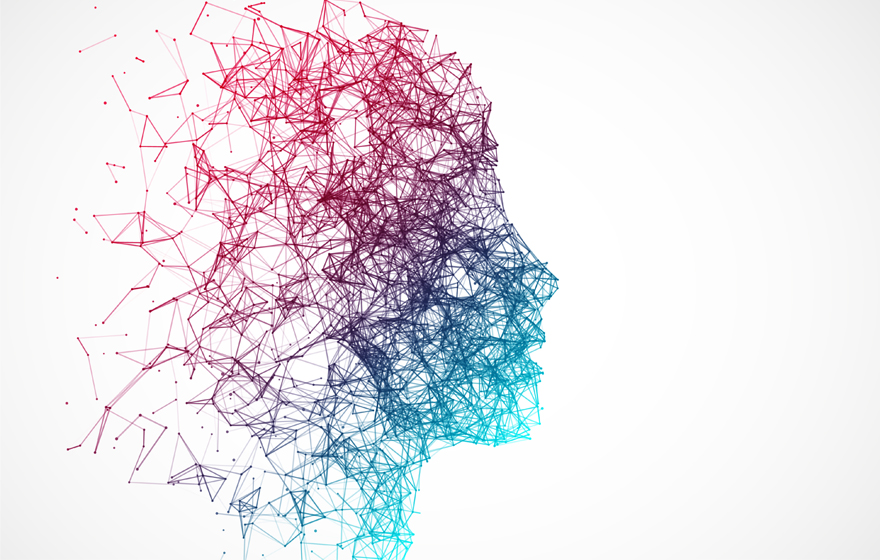 -->
    <div style="font-size:3rem;font-weight:bold;">Projet IA</div>
    <div style="font-size:2rem;">IA for HumanForYou</div>
</center>

**Groupe 1** :
- Romain HEMART
- Cyr-Manuel DJOKI
- Antoine TAFFOUREAU
- Alban GODIER

📅 19/12/2024

In [288]:
import time
import datetime
import warnings
import math as math
from os import path, getcwd, listdir

# Traitement des données
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Modèles
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron, LogisticRegression

# Métriques
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_auc_score, roc_curve, f1_score

# Entrainement
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

# Affichage
import IPython
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt 
from IPython.display import display, HTML

# Constantes
# La réponse à la grande question sur la vie, l'univers et le reste
RANDOM_SEED = 42
# Localisation des datasets. Cette constante donne l'emplacement du dossier contenant les datasets.
DATASETS_DIRECTORY = path.join(getcwd(), 'datasets')

# Réglages
np.random.seed(RANDOM_SEED)
warnings.filterwarnings("ignore")

# Contexte

L'entreprise pharmaceutique HumanForYou, basée en Inde, emploie environ 4000 personnes. Cependant, chaque année, elle connaît un taux de rotation d'environ 15 % de ses employés, ce qui nécessite de trouver des profils similaires sur le marché de l'emploi.

La direction considère que ce niveau de rotation n'est pas bénéfique pour l'entreprise pour les raisons suivantes :
- Les projets sur lesquels travaillaient les employés quittant la société prennent du retard, ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.
- Il est nécessaire de conserver un service des ressources humaines conséquent afin d'avoir les moyens de trouver de nouveaux employés.
- L'arrivée des nouveaux employés entraîne une perte de temps, car ils doivent souvent être formés et ont besoin d'un certain temps pour être pleinement opérationnels dans leur nouvel environnement.

La direction fait donc appel à vous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de rotation et pour proposer des modèles afin d'identifier des pistes d'amélioration permettant de motiver les employés à rester dans l'entreprise.

## Données disponibles

### Données des ressources humaines

- Age : L'âge de l'employé en 2015.
- Attrition : L'objet de notre étude, est-ce que l'employé a quitté l'entreprise durant l'année 2016 ?
- BusinessTravel : A quel fréquence l'employé a été amené à se déplacer dans le cadre de son travail en 2015 ? (Non-Travel = jamais, Travel_Rarely= rarement, Travel_Frequently = fréquemment)
- DistanceFromHome : Distance en km entre le logement de l'employé et l'entreprise.
- Education : Niveau d'étude : 1=Avant College (équivalent niveau Bac), 2=College (équivalent Bac+2), 3=Bachelor (Bac+3), 4=Master (Bac+5) et 5=PhD (Thèse de doctorat).
- EducationField : Domaine d'étude, matière principale
- EmployeeCount : booléen à 1 si l'employé était compté dans les effectifs en 2015.
- EmployeeId : l'identifiant d'un employé
- Gender : Sexe de l'employé
- JobLevel : Niveau hiérarchique dans l'entreprise de 1 à 5
- JobRole : Métier dans l'entreprise
- MaritalStatus : Statut marital du salarié (Célibataire, Marié ou Divorcé).
- MonthlyIncome : Salaire brut en roupies par mois
- NumCompaniesWorked : Nombre d'entreprises pour lequel le salarié a travaillé avant de rejoindre HumanForYou.
- Over18 : Est-ce que le salarié a plus de 18 ans ou non ?
- PercentSalaryHike : % d'augmentation du salaire en 2015.
- StandardHours : Nombre d'heures par jour dans le contrat du salarié.
- StockOptionLevel : Niveau d'investissement en actions de l'entreprise par le salarié.
- TotalWorkingYears : Nombre d'années d'expérience en entreprise du salarié pour le même type de poste.
- TrainingTimesLastYear : Nombre de jours de formation en 2015
- YearsAtCompany : Ancienneté dans l'entreprise
- YearsSinceLastPromotion : Nombre d'années depuis la dernière augmentation individuelle
- YearsWithCurrentManager : Nombre d'années de collaboration sous la responsabilité du manager actuel de l'employé.

### Dernière évaluation du manageur

- L'identifiant de l'employé : EmployeeID
- Une évaluation de son implication dans son travail notée 1 ('Faible'), 2 ("Moyenne"), 3 ("Importante") ou 4 ("Très importante") : JobInvolvement
- Une évaluation de son niveau de performance annuel pour l'entreprise notée 1 ("Faible"), 2 ("Bon"), 3 ("Excellent") ou 4 ("Au delà des attentes") : PerformanceRating

### Enquête sur la qualité du travail

- L'environnement de travail, noté 1 ("Faible"), 2 ("Moyen"), 3 ("Élevé") ou 4 ("Très élevé") : EnvironmentSatisfaction
- Son travail, noté de 1 à 4 comme précédemment : JobSatisfaction
- Son équilibre entre vie professionnelle et vie privée, noté 1 ("Mauvais"), 2 ("Satisfaisant"), 3 ("Très satisfaisant") ou 4 ("Excellent") : WorkLifeBalance

### Temps de travail

- Heures d'arrivée par jour
- Heures de départ par jour

# Préparations de données

## Sélection des données

### Comment sélectionne t-on les variables à garder ?

Dans le cadre de notre projet, nous allons devoir nous pencher sur les directions éthiques et juridiques de l'utilisation des données dans l'apprentissage de nos données.

En effet, notre société travaillant en collaboration avec des entreprises situées en Europe, nous allons devoir suivre les différentes réglementations du Règlement général sur la protection des données (RGPD) <sup>[[2]](#ressource-2)</sup>.
De plus dès lors que nous traitons un système d'IA, nous devons nous interroger sur la nature des données utilisées ainsi que si ces dernières peuvent amener notre modèle d'intelligence artificielle à discriminer des personnes.

Nous identifierons, les variables sensibles en fonction des critères de l'*Assessment List for Trustworthy Artificial Intelligence (ALTAI)* <sup>[[1]](#ressource-1)</sup> : 
- Données personnelles : Toute information permettant d'identifier directement ou indirectement une personne
  Ex: Nom, Prénom, Adresse, Numéro de téléphone, Email, etc.
- Données sensibles au sens juridique : Conformément au RGPD, il s'agit des données révélant : une origine raciale ou ethnique, opinions politiques, convisions religieuses ou philosophiques, appartenance syndicale, données génétiques ou biométriques, données de santé, orientations ou activités sexuelles, etc.
- Variables pouvant mener à une discrimination : Certaines informations peuvent exposer des individus ou des groupes à des risques de biais ou d'injustice. Exemples : âge, genre, handicap, statut économique, lieu de résidence.
- Variables indirectement sensibles : Même si elles ne sont pas explicitement sensibles, ces variables peuvent être corrélées avec des informations sensibles.
  Exemple : Le code postal peut refléter le niveau socio-économique d'une personne. La profession peut être liée au genre ou à l'origine ethnique.
- Variables contextuelles : Selon le contexte d'utilisation, certaines variables peuvent devenir sensibles. Par exemple, des données de localisation peuvent être critiques dans le cadre d'un suivi ou d'une surveillance.

### Variables non-sensibles

- Attrition : L'objet de notre étude, est-ce que l'employé a quitté l'entreprise durant l'année 2016 ?
- BusinessTravel : A quel fréquence l'employé a été amené à se déplacer dans le cadre de son travail en 2015 ? (Non-Travel = jamais, Travel_Rarely= rarement, Travel_Frequently = fréquemment)
- DistanceFromHome : Distance en km entre le logement de l'employé et l'entreprise.
- Education : Niveau d'étude : 1=Avant College (équivalent niveau Bac), 2=College (équivalent Bac+2), 3=Bachelor (Bac+3), 4=Master (Bac+5) et 5=PhD (Thèse de doctorat).
- EducationField : Domaine d'étude, matière principale
- EmployeeCount : booléen à 1 si l'employé était compté dans les effectifs en 2015.
- JobLevel : Niveau hiérarchique dans l'entreprise de 1 à 5
- JobRole : Métier dans l'entreprise
- MonthlyIncome : Salaire brut en roupies par mois
- NumCompaniesWorked : Nombre d'entreprises pour lequel le salarié a travaillé avant de rejoindre HumanForYou.
- Over18 : Est-ce que le salarié a plus de 18 ans ou non ?
- PercentSalaryHike : % d'augmentation du salaire en 2015.
- StandardHours : Nombre d'heures par jour dans le contrat du salarié.
- StockOptionLevel : Niveau d'investissement en actions de l'entreprise par le salarié.
- TotalWorkingYears : Nombre d'années d'expérience en entreprise du salarié pour le même type de poste.
- TrainingTimesLastYear : Nombre de jours de formation en 2015
- YearsAtCompany : Ancienneté dans l'entreprise
- YearsSinceLastPromotion : Nombre d'années depuis la dernière augmentation individuelle
- YearsWithCurrentManager : Nombre d'années de collaboration sous la responsabilité du manager actuel de l'employé.

### Variables sensibles

- Age : L'âge de l'employé en 2015.
- EmployeeId : l'identifiant d'un employé
  > Cette variable ne sera pas utilisée dans le modèle d'IA pour respecter l'anonymat des employés et parce qu'elle n'est pas pertinente pour la prédiction.
- JobInvolvement : Une évaluation de son implication dans son travail


L'utilisation de l'âge est une donnée qui ne doit pas être utilisée, car cette dernière va à l'encontre des notions éthiques sur le droit primaire à la conservation de la vie privée ainsi que la protection de ces dites données. De plus, cette donnée pourrait créer un biais et ainsi influencer l'IA à discriminer les employés selon ce paramètre.

L'identifiant des employés, quant à lui, est une donnée qui, elle, pourrait créer un biais de discrimination, ainsi qu'influencer les réponses et les perturber. De ce fait, nous allons les conserver afin de pouvoir ressortir les résultats ; ils ne seront toutefois pas inscrits dans les données d'entraînement.

L'évaluation de l'implication de l'employé dans son travail est retirée et est classée comme variable sensible, car c'est une variable qui s'appuie sur le jugement de son manager et donc qui peut ne pas être objectif à chaque fois.

### Variables interdites

- MaritalStatus : Statut marital du salarié (Célibataire, Marié ou Divorcé).
- Gender : Sexe de l'employé
- WorkLifeBalance : son équilibre entre vie professionnelle et vie privée

L'utilisation du sexe des individus est une donnée qui ne doit pas être utilisée, car cette dernière va à l'encontre des notions éthiques sur le droit primaire à la conversation de la vie privée ainsi que la protection de ces dites données. De plus, cette donnée pourrait créer un biais et ainsi influencer l'IA à discriminer les employés selon ce paramètre.

L'utilisation des statuts matrimoniaux est une donnée qui ne doit pas être utilisée, car cette dernière va à l'encontre des notions éthiques sur le droit primaire à la conservation de la vie privée ainsi que la protection de ces dites données.

### Respect de l'autonomie humaine 

Notre IA sera une IA supervisée, cela veut dire qu'elle sera entrainée avec des données étiquetées où chaque entrée a une sortie connue. Elle est chargée de prédire un résultat en réduisant un minimum l'écart de sortie, elle ne peut donc pas prendre de décision seule. Nous nous sommes également basés sur la ressource ALTAI<sup>[[1]](#ressource-1)</sup> , notre système d'IA va soutenir l'autonomie et la prise de décisions humaines conformément au principe du *respect de l'autonomie humaine*.  

### Robustesse technique et sécurité

Pour parvenir à une IA digne de confiance, nous devons nous assurer de sa robustesse.
La robustesse technique d’une IA fait référence à sa capacité à fonctionner de manière fiable et sécurisée dans diverses conditions.

<u>Résilience aux attaques et sécurité</u> : Afin d'empêcher toute intrusion depuis l'extérieur, le modèle sera Air Gap<sup>[[6]](#ressource-5)</sup>  (méthode de sécurité de sauvegarde et de restauration qui isole les données, les systèmes et les réseaux, et les maintient déconnectés pour empêcher toute intrusion non autorisée).  
Pour empêcher toute exfiltration de données de la part d'une personne ayant accès au modèle, les données seront anonymisées, ce qui rendra le traitement des données inefficace pour de l'ingénierie sociale.

<u>Précision</u> : Pour la précision de notre modèle, avec les données que nous avons à notre disposition, nous découperons les données en 2 parties :   
- Les données d'entrainements : ces données seront utilisées afin d'entraîner l'IA, et elles seront stockées en mémoire.
- Les données de test : l'IA n'aura pas connaissance de ces données, elles serviront de base pour noter la capacité qu'a chaque modèle d'IA de nous donner une solution juste ou non.
Les résultats obtenus seront systématiquement analysés par un humain qui se chargera de décider si le résultat est viable ou non. Pour mesurer la précision de notre modèle, nous nous baserons sur le rapport donné par une fonction du module *scikit-learn* (Accuracy) qui nous donnera la précision de notre modèle.

<u> Fiabilité et reproductibilité</u> : Pour la fiabilité de notre modèle, nous nous appuierons sur différentes méthodes pour la calculer, comme la validation croisée, l'erreur quadratique moyenne, les coefficients de détermination, et l'indice de stabilité.

### Respect de la vie privée et gouvernance des données

<u>Respect de la vie privée et protection des données</u> : Comme mentionné précédemment, afin de garantir une anonymisation totale des données, nous exclurons certaines catégories de données des modèles d'entraînement. Les catégories de données liées à l'âge, au sexe, au statut civil, etc., ne seront donc pas utilisées par les modèles. Cela évitera toute forme de jugement ou d’interprétation sur les employés de l’entreprise.

<u>Qualité et intégrité des données</u> : Concernant la qualité des données, nous procéderons à un traitement pour remplacer, par exemple, les données manquantes par la médiane. Nous veillerons à ce que l’ensemble des données utilisées pour l’entraînement de nos modèles soit pertinent. Comme mentionné précédemment, les données seront anonymisées, ce qui réduira considérablement les biais sociaux, culturels, religieux, etc. Nous nous assurerons également de l'intégrité des données afin qu’aucune information malveillante ne vienne altérer les résultats de nos modèles

<u>Accès aux données</u> : Aucune des données ne sera mise à la disposition des employés ou des utilisateurs des modèles.

### Transparence

<u> Traçabilité </u> : Toutes les données ont été collectées, soit par sondage auprès des entreprises, soit par évaluation des managers, ou encore par les RH. Quant aux processus utilisés par le système d’IA pour rendre des décisions, nous expliquerons chaque fonction dans le notebook au sein de notre code.

<u> Explicabilité </u> : Comme mentionné précédemment, les fonctions et les paramètres que nous intégrerons dans le rendu de nos modèles seront commentés dans le code.

<u> Communication </u> : Nos modèles d’IA se présenteront comme tels, afin que les utilisateurs soient informés à chaque lancement qu’ils interagissent avec une IA.

### Diversité, non-discrimination et équité

<u>Absence de biais injustes </u> : Afin de garantir l'absence de biais dans nos modèles, nous exclurons, comme mentionné précédemment, certaines données de l’apprentissage. Cela inclut toutes les variables interdites (statut marital, sexe, équilibre vie privée/professionnelle) et les variables sensibles (âge, identifiant employé). L’ensemble des données avec lesquelles nous entraînerons les modèles sera donc anonymisé et conçu de manière à éviter tout biais injuste. 

<u>Accessibilité et conecption universlle </u> : Afin d’assurer une accessibilité à tous les utilisateurs, une documentation sera également conçue pour faciliter la prise en main et la compréhension de tous les aspects des modèles.

<u>Participation des parties prenantes </u> : Après l’implémentation de notre modèle final dans l’entreprise, nous demanderons un suivi des résultats afin de nous assurer que notre modèle s’adapte bien dans une situation réelle. Cela nous permettra également d’améliorer notre modèle en ajustant certains paramètres si nécessaire.

### Bien-être sociétal et environnemental

<u>Incidences sociales </u> : Nos modèles ne nuiront ni au bien-être moral ni au bien-être physique, car ils seront impartiaux. L'objectif de l'utilisation de ces modèles est de prévenir les départs potentiels d'employés et de proposer des solutions pour les inciter à rester au sein de l’entreprise.

### Responsabilité 

<u>Auditabilité </u> :  Nos données d'entraînement resteront à disposition des entreprises tierces pour effectuer des audits dans le cadre des certifications ou des exigences légales de nos modèles.

<u>Réduction au minimum et documentation des incidences négatives </u> : Comme mentionné précédemment, notre code sera commenté pour clarifier le rôle de chaque fonction, et une documentation sera mise à disposition.

## Traitement des données

### Chargement des données

Pour le chargement des données depuis les fichiers CSV, nous utiliserons la librairie Pandas

In [289]:
def load_dataset(name: str) -> pd.DataFrame:
    """
    Charge un dataset depuis un fichier CSV.

    Arguments : 
    - name (str) : Nom du dataset à charger sans l'extension (.csv)
                   Ex : 'general_data'

    Retour : (pandas.DataFrame)
    Dataset sous forme d'un DataFrame de Pandas.

    Exemple : 
    df = load_dataset("general_data")
    df.describe()
    """
    
    location = path.join(DATASETS_DIRECTORY, name + '.csv')
    if not path.exists(location): 
        raise Exception('Fichier introuvable')

    df = pd.read_csv(location)
    df.name = name

    # Définition de la colonne EmployeeID comme index de nos données  
    if 'EmployeeID' in df.columns:
        df.set_index('EmployeeID', inplace=True)
    elif 'Unnamed: 0' in df.columns: # Dans les datasets in_time et out_time, la colonne des identifiants des employés n'est pas nommée.
        df.set_index('Unnamed: 0', inplace=True)
        # Convertion du format par défaut des données (object) en datetime.
        for column in df.columns:
            df[column] = pd.to_datetime(df[column], format="%Y-%m-%d %H:%M:%S")
    
    return df

def load_datasets(*names: list[str]) -> list[pd.DataFrame]:
    """
    Charge plusieurs datasets depuis des fichiers CSV. Un dataset par fichier.

    Arguments : 
    - *names (str) : Noms des datasets à charger sans l'extension (.csv)
                    Ex : 'general_data', 'in_time'

    Retour : (list[pandas.DataFrame])
    Liste de datasets sous forme d'un DataFrame de Pandas.

    Exemple : 
    dfs = load_datasets("general_data", "in_time")
    print("Dataset :", dfs[0].name)
    dfs[0].describe()
    """

    dfs = []
    for name in names:
        dfs.append(load_dataset(name))

    return dfs

def load_all_datasets() -> list[pd.DataFrame]:
    """
    Charge tous les datasets présents dans le dossier DATASETS_DIRECTORY.

    Arguments: 
    /

    Retour : (list[pandas.DataFrame])
    Liste de datasets sous forme d'un DataFrame de Pandas.
    
    Exemple : 
    dfs = load_all_datasets()
    print("Dataset :", dfs[0].name)
    dfs[0].describe()
    """

    dfs = []
    for item in listdir(DATASETS_DIRECTORY):
        if path.isfile(path.join(DATASETS_DIRECTORY, item)):
            dfs.append(load_dataset(item[:-4]))

    return dfs

def df_list_to_dict(dfs: list[pd.DataFrame]) -> dict[str,pd.DataFrame]:
    """
    Par défaut, les fonctions ci-dessus renvoient une liste de datasets où chaque dataset possède 
    la propriété 'name' contenant le nom du fichier de provenance du dataset.

    Cette fonction permet d'indexer les datasets en fonction du nom de celui-ci.

    Arguments : 
    - dfs (list[pd.DataFrame]) : Liste des datasets

    Retour : (dict[str,pd.DataFrame])
    Dictionnaire où les datasets sont indéxés en fonction du nom du fichier d'origine.

    Exemple : 
    dfs = load_all_datasets()
    dict_dfs = df_list_to_dict(dfs)
    """
    return {df.name : df for df in dfs}

In [290]:
def describe(df: pd.DataFrame, show: bool = True) -> None :
    """
    Affiche les informations communes d'un pandas.DataFrame sous la forme de plusieurs onglets en exécutant : 
    - pandas.DataFrame.info() : affiche des informations sur un DataFrame, notamment le type d'index et les colonnes, les valeurs non nulles et l'utilisation de la mémoire.
    - pandas.DataFrame.head() : affiche les premières lignes du dataset.
    - pandas.DataFrame.describe() : Affiche les statistiques descriptives, y compris celles qui résument la tendance centrale, la dispersion et la forme de la distribution d'un ensemble de données, à l'exclusion des valeurs NaN.
    - pandas.DataFrame.isnull().sum() : Affiche le nombre de données manquantes par colonne.
    - pandas.DataFrame.value_counts() : Affiche le nombre d'occurence pour chaque catégorie.

    Arguments : 
    - df (pandas.DataFrame) : Le dataset dont on souhaite obtenir les informations.
    - show (bool) [True] : Si on souhaite afficher directement les onglets ou renvoyer un object ipywidgets.Tab.

    Retour : (None | ipywidgets.Tab)
    Rien ou un objet ipywidgets.Tab.

    Exemple : 
    df = load_dataset("general_data")
    describe(df)
    """

    def display_categoricals(df):
        categoricals_columns = df.select_dtypes(include=[object]).columns

        if not len(categoricals_columns):
            print('Pas de colonnes catégorielles')
            return

        widget = widgets.Tab()
        titles, children = [], []

        for column in categoricals_columns:
            titles.append(column)
            children.append(widgets.Output())
            with children[-1]:
                print(df[column].value_counts())

        widget.children, widget.titles = children, titles

        display(widget)
    
    
    tabs = (
        ('Informations', lambda: df.info()),
        ('Aperçu', lambda: display(df.head())),
        ('Description', lambda : display(df.describe())),
        ('Valeurs manquantes', lambda : display(df.isnull().sum())),
        ('Variables catégorielles', lambda : display_categoricals(df))
    )

    widget = widgets.Tab()
    titles, children = [], []
    for tab in tabs: 
        titles.append(tab[0])
        children.append(widgets.Output())
        with children[-1]:
            tab[1]()

    widget.children, widget.titles = children, titles

    if show :
        display(widget)
    else : 
        return widget

def describe_several(*dfs: list[pd.DataFrame], show: bool = True):
    """
    Affiche les informations communes de plusieurs pandas.DataFrame sous la forme de plusieurs onglets d'onglets en exécutant : 
    - pandas.DataFrame.info() : affiche des informations sur un DataFrame, notamment le type d'index et les colonnes, les valeurs non nulles et l'utilisation de la mémoire.
    - pandas.DataFrame.head() : affiche les premières lignes du dataset.
    - pandas.DataFrame.describe() : Affiche les statistiques descriptives, y compris celles qui résument la tendance centrale, la dispersion et la forme de la distribution d'un ensemble de données, à l'exclusion des valeurs NaN.
    - pandas.DataFrame.isnull().sum() : Affiche le nombre de données manquantes par colonne.
    - pandas.DataFrame.value_counts() : Affiche le nombre d'occurence pour chaque catégorie.

    Arguments : 
    - *dfs (list[pandas.DataFrame]) : Les datasets dont on souhaite obtenir les informations.
    - show (bool) [True] : Si on souhaite afficher directement les onglets ou renvoyer un object ipywidgets.Tab.

    Retour : (None | ipywidgets.Tab)
    Rien ou un objet ipywidgets.Tab.

    Exemple : 
    dfs = load_all_dataset()
    describe_several(dfs)
    """

    widget = widgets.Tab()
    titles, children = [], []
    for df in dfs:
        titles.append(df.name)
        children.append(describe(df, show=False))

    widget.children, widget.titles = children, titles

    if show :
        display(widget)
    else : 
        return widget

In [291]:
dfs = load_all_datasets()
dfs_dict = df_list_to_dict(dfs)
describe_several(*dfs)

# Liste des colonnes catégorielles et numériques pour garder une trace après la
# modification des datasets (OneHotEncoder, ...)
columns_cat = []
columns_num = []
for df_name, df in dfs_dict.items():
    if df_name not in ('in_time', 'out_time') :
        columns_num += df.select_dtypes(include=['number']).columns.tolist()
        columns_cat += df.select_dtypes(exclude=['number']).columns.tolist()

**Mise en conformité du dataset d'entrainement en fonction des règles éthiques définies ci-dessus** :

Précédemment, nous avons défini des variables comme sensibles ou interdites que nous allons supprimer : 
- `Age` : L'âge de l'employé en 2015.
- `EmployeeId` : l'identifiant d'un employé
- `MaritalStatus` : Statut marital du salarié (Célibataire, Marié ou Divorcé).
- `Gender` : Sexe de l'employé
- `WorkLifeBalance` : Équilibre entre vie professionnelle et vie privée
- `JobInvolvement` : L'évaluation du manageur

Note: La variable `EmployeeID` est utilisée comme colonne d'index, donc il n'est pas nécessaire de la supprimer.

In [292]:
columns_to_drop = ["Age", "MaritalStatus", "Gender", "WorkLifeBalance", "JobInvolvement"]

for df in dfs:
    df.drop(columns=columns_to_drop, inplace=True, errors="ignore")

for col in columns_to_drop:
    if col in columns_num: columns_num.remove(col)
    if col in columns_cat: columns_cat.remove(col)

### Analyse des datasets in_time et out_time

Les datasets `in_time` et `out_time` n'adoptent pas la même forme que les autres datasets : là où les datasets `general_data`, `employee_survey_data` et `manager_survey_data` contiennent une variable par colonne par exemple `Age` ou `JobLevel`. À l'inverse, les datasets susnommés (`in_time` et `out_time`) sont sous la forme de tableaux dont les colonnes sont les jours travaillés et les lignes représentent les employés.

Cette partie a pour but d'analyser ces deux datasets afin de regrouper les données en une ou plusieurs colonnes.

In [293]:
def time_datasets_analytics(in_time: pd.DataFrame, out_time: pd.DataFrame):
    """
    Analyse les datasets in_time et out_time. Cette fonction calculera les moyennes, les médianes, 
    les écarts-types, les minimums et les maximums pour chaque colonne de in_time et out_time. 
    Elle affichera également des histogrammes des moyennes en fonction des jours (colonnes).
    
    Arguments : 
    - in_time : DataFrame contenant les temps d'entrée. Les colonnes sont les jours et les lignes les employés.
    - out_time : DataFrame contenant les temps de sortie. Les colonnes sont les jours et les lignes les employés.
    
    Retourne :
    - None
    
    Exemple :
    time_datasets_analytics(in_time, out_time)
    """
    
    def get_timestamps(x: pd.Series) -> pd.Series:
        if pd.isnull(x):
            return np.nan
        dt = pd.to_datetime(x, format='%H:%M:%S').to_pydatetime()
        return dt.hour * 3600 + dt.minute * 60 + dt.second
    
    def get_time(x: pd.Series) -> pd.Series:
        if pd.isnull(x):
            return np.nan
        return pd.to_datetime(x, unit="s").to_pydatetime().strftime('%H:%M:%S')
    
    # Moyennes
    in_time_means = {}
    out_time_means = {}
    stats_results = pd.DataFrame(columns=['Moyenne', 'Médiane', 'Écart-type', 'Minimum', 'Maximum'], index=['In Time', 'Out Time'])
    
    for column in in_time.columns:
        in_time_means[column] = in_time[column].map(get_timestamps).mean()
    for column in out_time.columns:
        out_time_means[column] = out_time[column].map(get_timestamps).mean()
        
    in_time_means = pd.Series(in_time_means)
    in_time_means.name = 'In Time'
    out_time_means = pd.Series(out_time_means)
    out_time_means.name = 'Out Time'
    for data in (in_time_means, out_time_means):
        stats_results.loc[data.name] = [get_time(data.mean()), get_time(data.median()), get_time(data.std()), get_time(data.min()), get_time(data.max())]
        
    stats_results = pd.DataFrame(stats_results)
    
    display(stats_results)
    
    # Graphiques
    plt.figure(figsize=(15, 5))
    plt.plot(in_time_means.index, in_time_means, label='In Time')
    plt.plot(out_time_means.index, out_time_means, label='Out Time')
    plt.fill_between(in_time_means.index, in_time_means, out_time_means, color='blue', alpha=0.1)
    
    xticks = np.arange(0, len(in_time_means), 10)
    plt.xticks(xticks, in_time_means.index[xticks], rotation=45)
    
    yticks = np.linspace(in_time_means.min(), out_time_means.max(), 10)
    plt.yticks(yticks, [get_time(y) for y in yticks])
    
    plt.gca().invert_yaxis()
    plt.xlabel('Jours')
    plt.ylabel('Heure moyenne (s)')
    plt.title('Heure moyenne de travail par jour')
    plt.legend()

,Moyenne,Médiane,Écart-type,Minimum,Maximum
In Time,09:59:59,09:59:59,00:00:15,09:59:17,10:00:33
Out Time,17:42:30,17:42:30,00:00:25,17:41:18,17:43:49


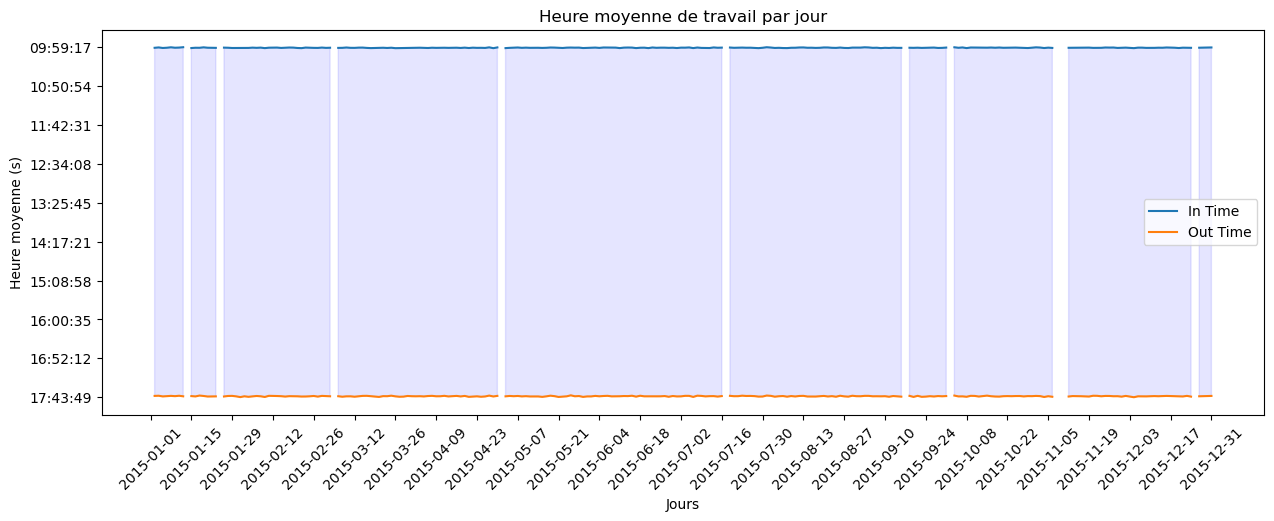

In [294]:
describe_several(dfs_dict['in_time'], dfs_dict['out_time'])
time_datasets_analytics(dfs_dict['in_time'], dfs_dict['out_time'])

On peut en déduire l'intervalle moyen de temps où les employés sont présents au bureau. En moyenne, les employés arrivent à 9h59 et repartent à 17h42.
De plus, ce graphique nous permet de constater des jours où aucun employés ne travaillent. Ces jours seront tout simplement ignorés par la suite.
Du fait de l'incapacité à utiliser ces données telles quelles, nous avons décidé de créer cinq nouvelles colonnes : 
- `in_time_mean` : Moyennes des heures d'arrivée sur l'année 2015.
- `out_time_mean` : Moyennes des heures de départ sur l'année 2015.
- `in_time_std` : Écarts-type des heures d'arrivée sur l'année 2015. Cette variable est importante pour se rendre compte de l'important des avances et retards de l'employé.
- `out_time_std` : Écarts-type des heures de départ sur l'année 2015. Cette variable est importante pour se rendre compte de l'important des avances et retards de l'employé.
- `day_worked` : Nombre de jours travaillés par an. 

### Encodage des variables

Pour convertir les variables catégorielles en données numériques, nous utiliserons la méthode `OneHotEncoder`. Cette méthode permet de représenter chaque variable catégorielle sous forme de plusieurs colonnes, où chaque colonne correspond à une valeur unique de la variable d'origine. Pour chaque observation, un 1 sera placé dans la colonne correspondant à la valeur observée, tandis que les autres colonnes contiendront un 0.

In [295]:
prepared_dfs_dict = {}
for df_name in dfs_dict:
    prepared_dfs_dict[df_name] = dfs_dict[df_name].copy()
    prepared_dfs_dict[df_name].name = df_name

# general_data
general_data_cat = dfs_dict['general_data'].select_dtypes(include=[object]).drop(columns=['Attrition'])
general_data_other = dfs_dict['general_data'].select_dtypes(exclude=[object])

# Gestion de la catégorie 'Attrition' indépendament car c'est notre variable cible : elle doit être entière
data_attrition = dfs_dict['general_data'][['Attrition']].applymap(lambda x: 1. if x == 'Yes' else 0.)

# Gestion des valeurs catégorielles (uniquement dans general_data, les autres datasets n'ont pas de variables catégorielles)
encoder = OneHotEncoder()
general_data_cat = pd.DataFrame(
    encoder.fit_transform(general_data_cat).toarray(), 
    columns=encoder.get_feature_names_out(general_data_cat.columns), 
    index=general_data_cat.index
)

prepared_dfs_dict['general_data'] = pd.concat((general_data_other, general_data_cat, data_attrition), axis=1)
prepared_dfs_dict['general_data'].name = 'general_data'

# in_time / out_time
# Conversion des variables des datasets en valeurs numériques (actuellement, elles sont de type datetime64)
def datetime64_to_int(x: pd.Series) -> pd.Series:
    if pd.isnull(x):
        return np.nan
    dt = pd.to_datetime(x, format='%H:%M:%S').to_pydatetime()
    return dt.hour * 3600 + dt.minute * 60 + dt.second
    
for df_name in ('in_time', 'out_time'):
    prepared_dfs_dict[df_name] = prepared_dfs_dict[df_name].applymap(datetime64_to_int)
    prepared_dfs_dict[df_name].name  = df_name

# Création d'un dataset pour les colonnes en rapport avec les temps d'arrivée et de départ
time_data = pd.DataFrame()
time_data.name = 'time_data'
time_data['EmployeeID'] = prepared_dfs_dict['general_data'].index

in_time_mean, in_time_std, out_time_mean, out_time_std, day_worked = [], [], [], [], []

for i, row in prepared_dfs_dict['in_time'].iterrows():
    in_time_mean.append(row.mean())
    in_time_std.append(row.std())
    day_worked.append(float(row.count()))
    
for i, row in prepared_dfs_dict['out_time'].iterrows():
    out_time_mean.append(row.mean())
    out_time_std.append(row.std())
    
time_data['in_time_mean'] = in_time_mean
time_data['in_time_std'] = in_time_std
time_data['out_time_mean'] = out_time_mean
time_data['out_time_std'] = out_time_std
time_data['day_worked'] = day_worked

if not 'in_time_mean' in columns_num:
    columns_num += ['in_time_mean', 'in_time_std', 'out_time_mean', 'out_time_std', 'day_worked']
    
time_data.set_index('EmployeeID', inplace=True)
prepared_dfs_dict['time_data'] = time_data
del prepared_dfs_dict['in_time']
del prepared_dfs_dict['out_time']

describe_several(*prepared_dfs_dict.values())

### Gestion des valeurs manquantes

Pour la gestion des valeurs manquantes, nous pourrons utiliser les fonctionnalités des librairies
- Pandas (`pandas.DataFrame().fillna()`)
- SKLearn (`sklearn.SimpleImputer().transform()`)


In [296]:
def numerical_impute_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    Réalise une imputation des valeurs numériques manquantes dans un DataFrame.

    Arguments : 
    - df (pd.DataFrame) : Le dataset à traiter.

    Retour : (pd.DataFrame)
    Le dataset traité.

    Exemple : 
    df.isnull().sum()
    numerical_impute_df(df).isnull().sum()
    """
    numerical_df = df.select_dtypes(include=[np.number])
    if not len(numerical_df.columns):
        return df
    others_types_df = df.select_dtypes(exclude=[np.number])
    imputer = SimpleImputer(strategy="median", keep_empty_features=True)
    numerical_df = pd.DataFrame(imputer.fit_transform(numerical_df), columns=numerical_df.columns, index=numerical_df.index)
    return pd.concat((numerical_df, others_types_df), axis=1)

def categorical_impute_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    Réalise une imputation des valeurs catégorielles manquantes dans un DataFrame.

    Arguments : 
    - df (pd.DataFrame) : Le dataset à traiter.

    Retour : (pd.DataFrame)
    Le dataset traité.

    Exemple : 
    df.isnull().sum()
    categorical_impute_df(df).isnull().sum()
    """
    categorical_df = df.select_dtypes(include=['object', 'category'])
    if not len(categorical_df.columns):
        return df
    others_types_df = df.select_dtypes(exclude=['object', 'category'])
    imputer = SimpleImputer(strategy="most_frequent", keep_empty_features=True)
    categorical_df = pd.DataFrame(imputer.fit_transform(categorical_df), columns=categorical_df.columns, index=categorical_df.index)
    return pd.concat((categorical_df, others_types_df), axis=1)

def datetime_impute_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    Réalise une imputation des valeurs temporelles manquantes dans un DataFrame.

    Arguments : 
    - df (pd.DataFrame) : Le dataset à traiter.

    Retour : (pd.DataFrame)
    Le dataset traité.

    Exemple : 
    df.isnull().sum()
    datetime_impute_df(df).isnull().sum()
    """
    datetime_df = df.select_dtypes(include=['datetime64'])
    if not len(datetime_df.columns):
        return df
    others_types_df = df.select_dtypes(exclude=['datetime64'])
    
    def get_timestamps(x: pd.Series) -> pd.Series:
        if pd.isnull(x):
            return np.nan
        dt = pd.to_datetime(x).to_pydatetime()
        return dt.hour * 3600 + dt.minute * 60 + dt.second

    # Convertion des dates en timestamp pour pouvoir les traiter comme des valeurs numériques
    datetime_df = datetime_df.applymap(get_timestamps)
    
    imputer = SimpleImputer(strategy="median", keep_empty_features=True)
    datetime_df = pd.DataFrame(imputer.fit_transform(datetime_df), columns=datetime_df.columns, index=datetime_df.index)
    for column in datetime_df.columns:
        datetime_df[column] = pd.to_datetime(datetime_df[column], unit="ns")
    return pd.concat((datetime_df, others_types_df), axis=1)

def impute_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    Réalise une imputation des valeurs manquantes dans un DataFrame.

    Arguments : 
    - df (pd.DataFrame) : Le dataset à traiter.

    Retour : (pd.DataFrame)
    Le dataset traité.

    Exemple : 
    df.isnull().sum()
    impute_df(df).isnull().sum()
    """
    return datetime_impute_df(categorical_impute_df(numerical_impute_df(df)))

In [297]:
widget = widgets.Tab()
titles, children = [], []
for df_name in prepared_dfs_dict:
    titles.append(df_name)
    children.append(widgets.Output())
    with children[-1]:
        before_imputing = prepared_dfs_dict[df_name].isnull().sum()
        prepared_dfs_dict[df_name] = numerical_impute_df(prepared_dfs_dict[df_name])
        prepared_dfs_dict[df_name].name = df_name
        after_imputing = prepared_dfs_dict[df_name].isnull().sum()
        print(pd.concat((before_imputing, after_imputing), axis=1).rename(columns={0: 'Avant imputation', 1: 'Après imputation'}))

widget.children, widget.titles = children, titles

print("Résultat de l'imputation :")
display(widget)
print("\nQuelques informations sur les datasets :")
describe_several(*prepared_dfs_dict.values())

Résultat de l'imputation :



Quelques informations sur les datasets :


Comment on peut le voir dans l'exemple, toutes les valeurs manquantes ont été remplacées, y compris les données temporelles. Cependant, il y a certains jours non travaillés où toutes les valeurs sont inexistantes (`NaN`), ce sont les jours de vacances. Ces jours seront traités plus tard. 

### Fusion des datasets

In [298]:
merged_df = pd.concat(prepared_dfs_dict.values(), axis=1)

describe(merged_df)

### Normalisation des données

La normalisation des données est une étape cruciale dans le prétraitement des données, elle permet de réduire les biais, mettre les variables sous une échelle uniforme, et faciliter la comparaison entre les variables et l'interprétation des coefficients des modèles. Dans notre cas, on utilisera la méthode `StandardScaler()` de la bibliothèque `scikit-learn` qui va normaliser les données en leur donnant une moyenne de 0 et un écart type de 1. 

In [299]:
scaler = StandardScaler()
data_num = merged_df[columns_num]
data_num_scaled = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns, index=data_num.index)

merged_scaled_df = pd.concat([
    merged_df.drop(columns=columns_num),
    data_num_scaled
], axis=1)

describe(merged_scaled_df)

### Visualisation

#### VIsualisation des variables numériques

Nous commencerons par visualiser les distributions des variables numériques pour mieux comprendre leurs comportements.

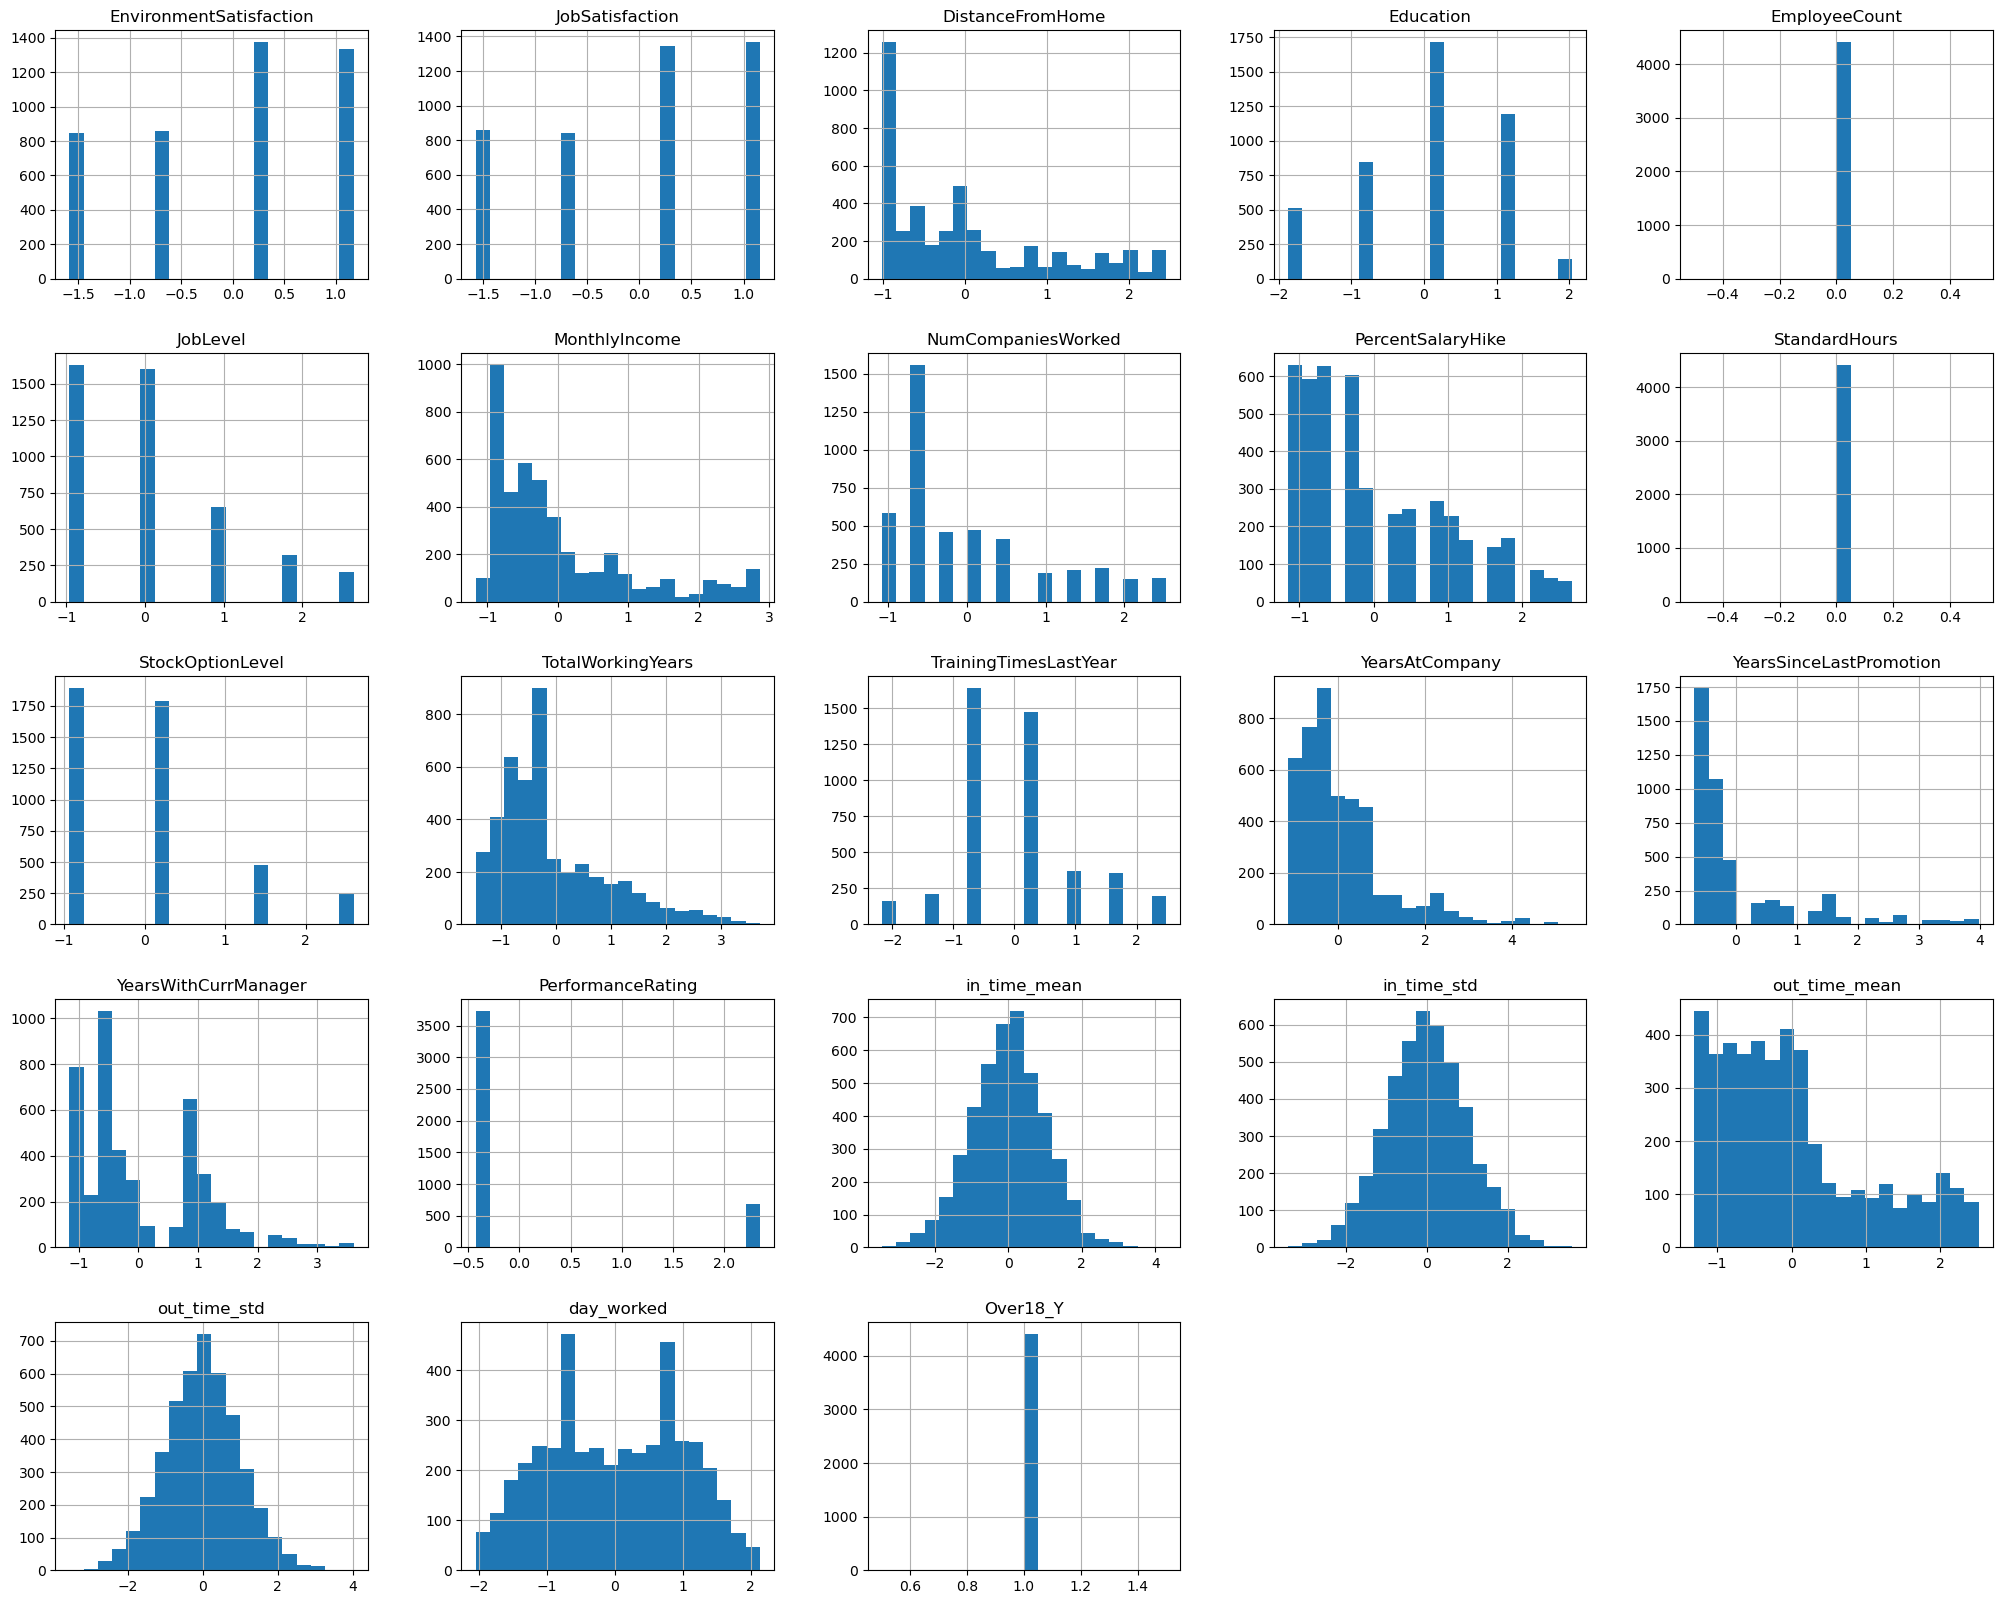

In [300]:
merged_scaled_df[columns_num+["Over18_Y"]].hist(bins=20, figsize=(25, 20))
plt.show()

##### Observations

Étant donné que les données `StandardHours`, `EmployeeCount` et `Over18` sont constantes, il n'est pas très intéressant de les étudier. On peut donc les enlever de notre étude.

On peut voir que `in_time_mean` , `in_time_std` et `out_time_std` suivent une distribution de la loi Normale.


In [301]:
col_to_drop = ('StandardHours', 'EmployeeCount', 'Over18_Y', 'Over18')
merged_scaled_df.drop(columns=col_to_drop, inplace=True, errors='ignore')
for col in col_to_drop: 
    if col in columns_cat:
        columns_cat.remove(col)
    if col in columns_num:
        columns_num.remove(col)

### Matrice de corrélation

Pour explorer les relations entre les variables numériques, nous utilisons une matrice de corrélation et une heatmap.

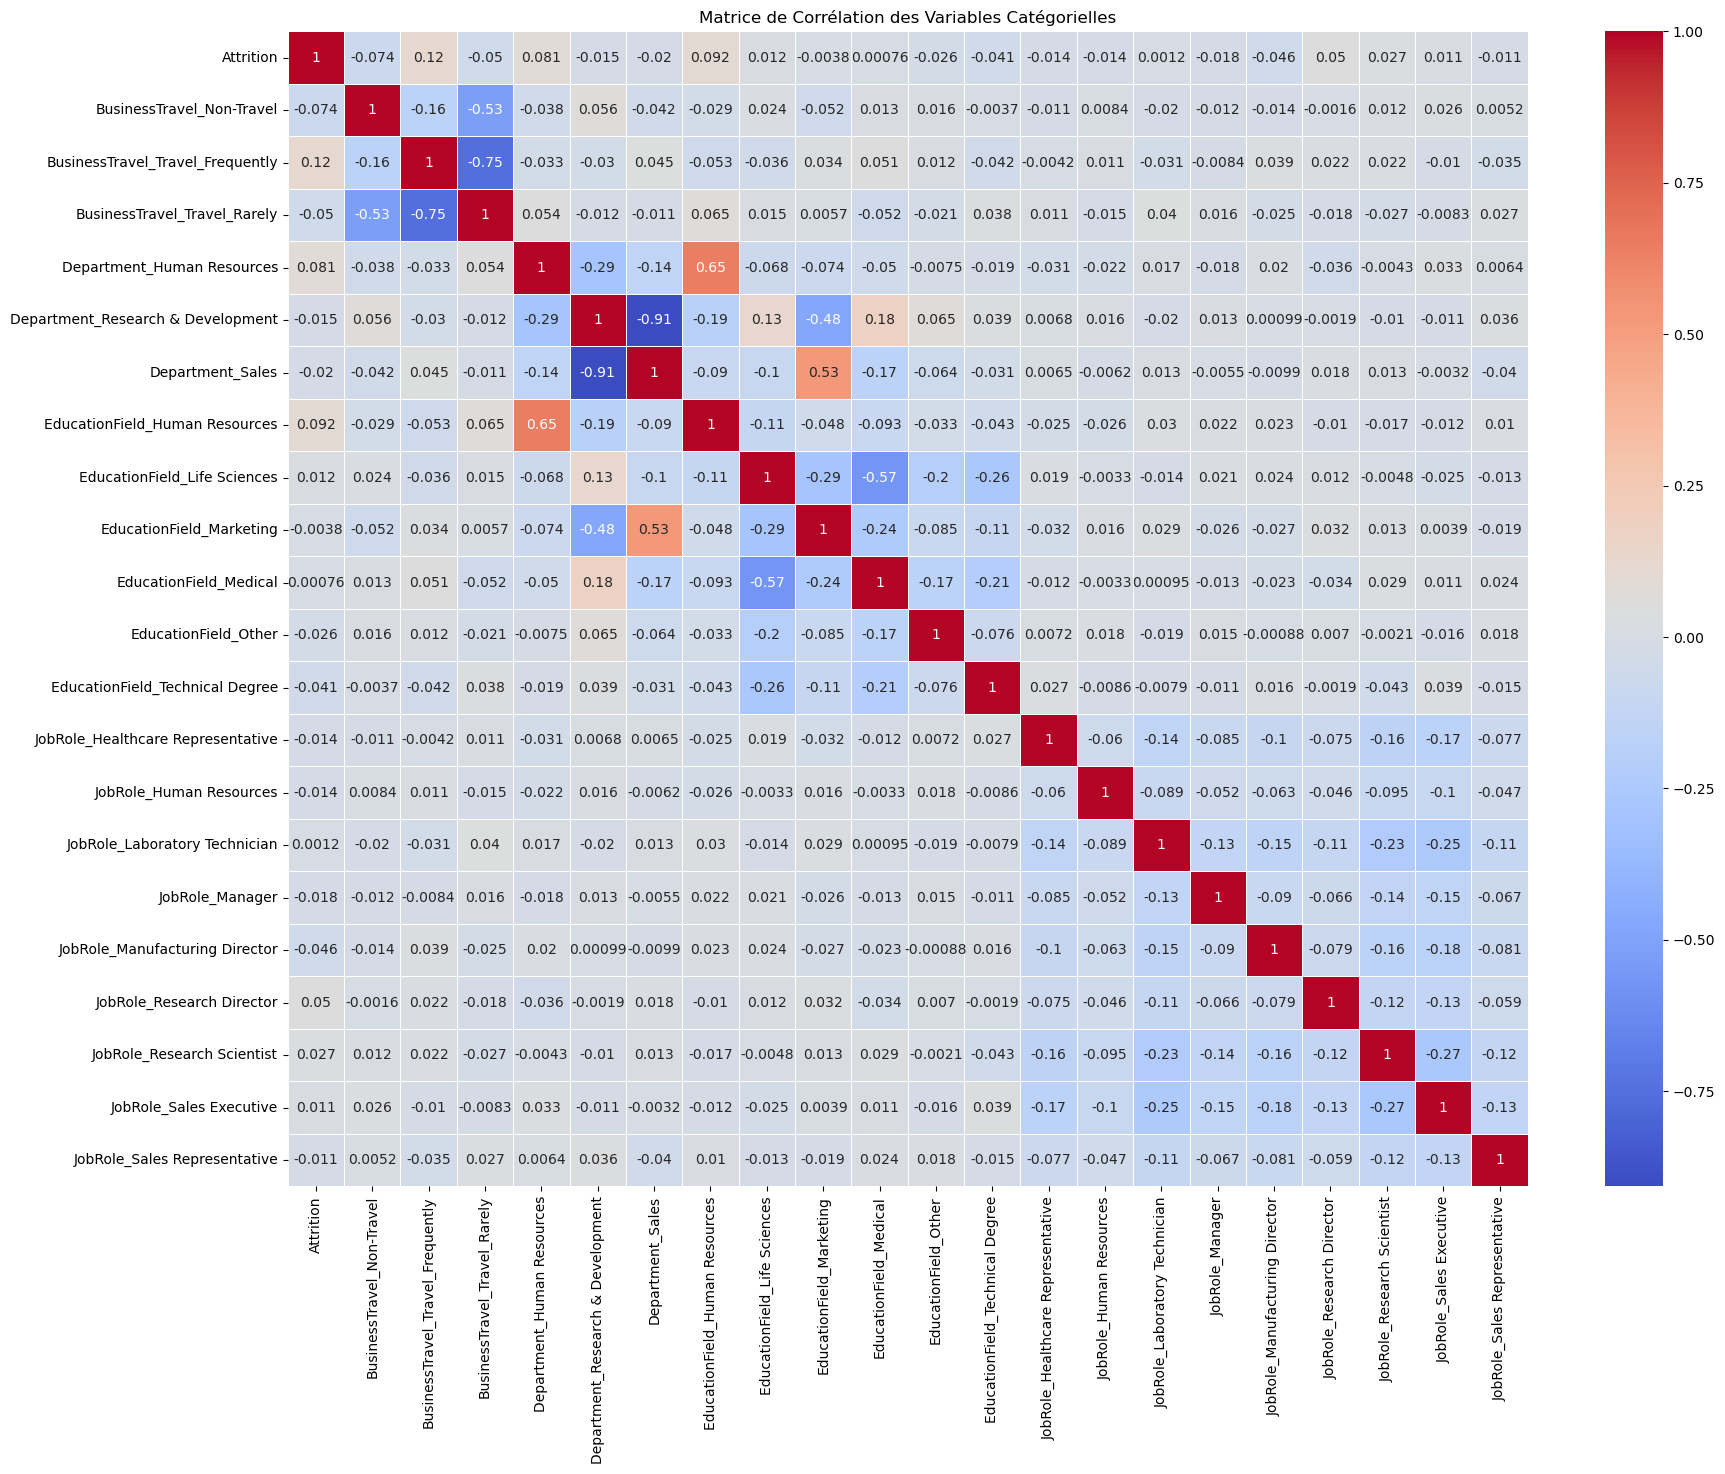

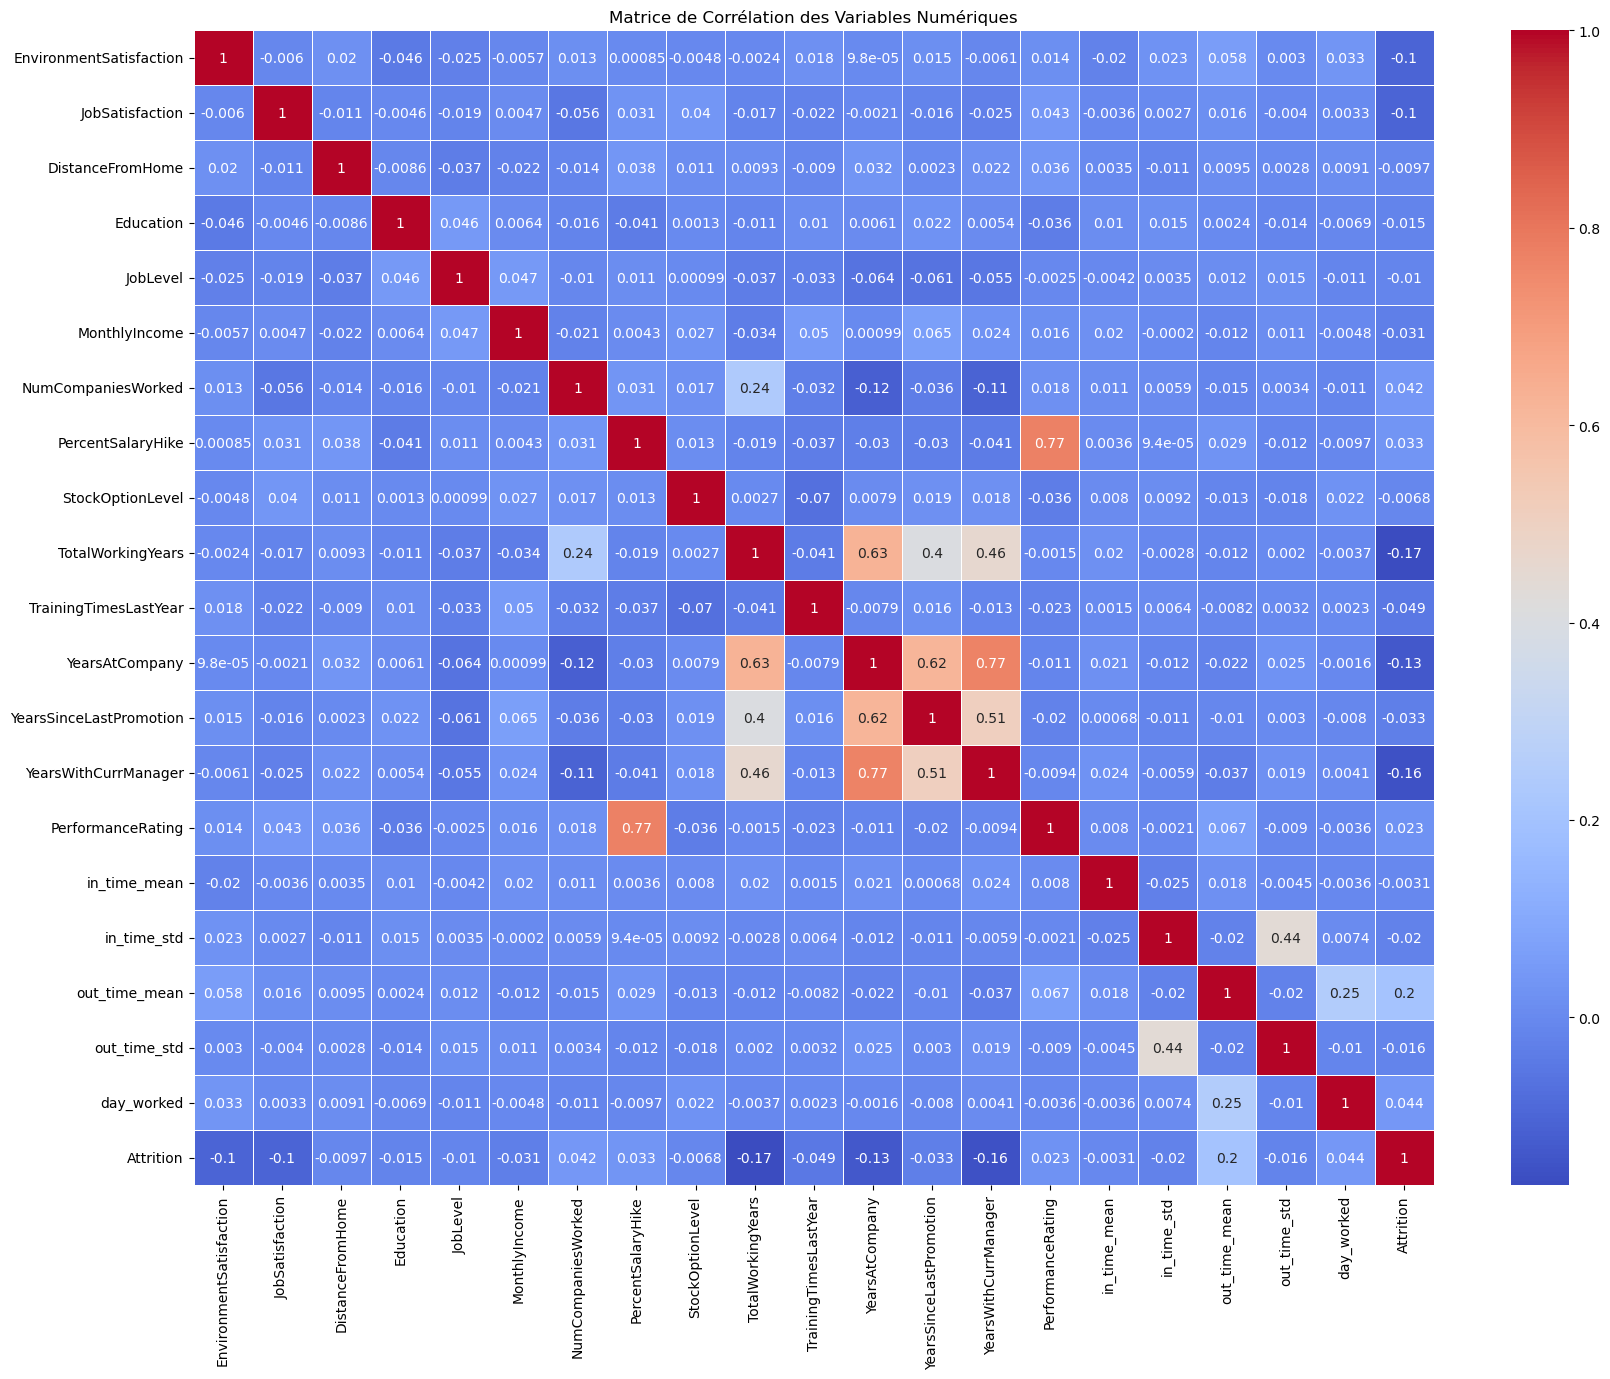

In [302]:
# Colonnes catégorielles
temp_col = []
for col in columns_cat:
    for col2 in merged_scaled_df.columns:
        if col2.startswith(col):
            temp_col.append(col2)
tmp_df = merged_scaled_df[temp_col].copy()
tmp_df['Attrition'] = merged_scaled_df['Attrition']
corr_matrix = tmp_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Catégorielles')
plt.show()

# Colonnes numériques
tmp_df =  merged_scaled_df[columns_num].copy()
tmp_df['Attrition'] = merged_scaled_df['Attrition']
corr_matrix = tmp_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

Dans notre problème, la variable qui nous intéresse est "Attrition", on peut observer une corrélation plus "forte" avec les variables :
- TotalWorkingYears
- YearsAtCompany
- YearsWithCurrManager
- out_time_mean : Heure moyenne d'arrivée d'un employé

Ces variables ont donc un impact plus important que les autres sur la conservation d'un employé au sein de l'entreprise.

À une echelle plus réduite, les colonnes ci-dessous ont une influence sur la conservation d'un employé au sein de l'entreprise : 
- EnvironmentSatisfaction
- JobSatisfaction
- BusinessTravel_Travel_Frequently

### Analyse de la variable cible

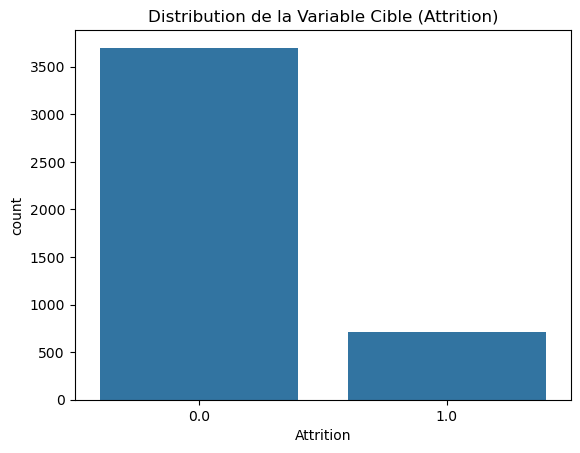

In [303]:
sns.countplot(x='Attrition', data=merged_scaled_df)
plt.title('Distribution de la Variable Cible (Attrition)')
# plt.xticks((0., 1.), ('Reste', 'Envisage de partir'))
plt.show()

La distribution de la variable cible `Attrition` est très déséquilibrée. Cela peut entrainer un biais important lors de la prédiction de cette variable pour de nouvelles données. En effet, du fait de la grande disparité des résultats, le modèle aura tendance à plus prédire la valeur $0$ (l'employé souhaite rester). 

#### Visualisation des relations entre les variables

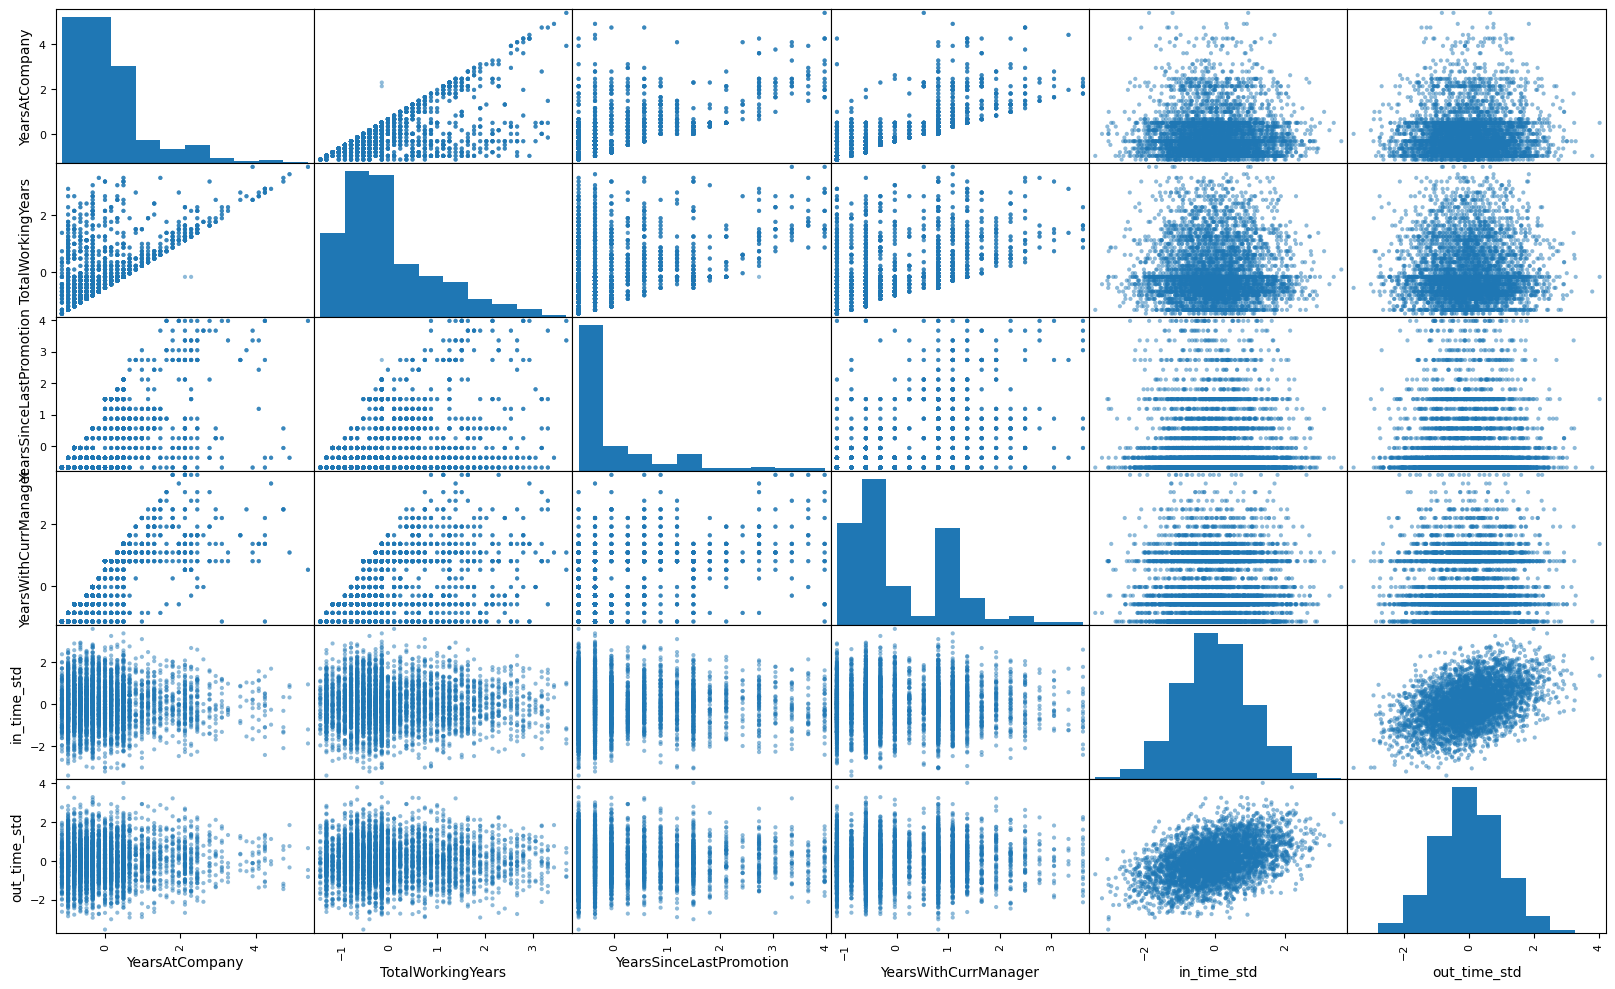

In [304]:
attributes = ["YearsAtCompany", "TotalWorkingYears", "YearsSinceLastPromotion", "YearsWithCurrManager", "in_time_std", "out_time_std"]
scatter_matrix = pd.plotting.scatter_matrix(merged_scaled_df[attributes], figsize=(20, 12))
plt.show()

On peut observer que `in_time_std` et `out_time_std` sont très corrélés, `TotalWorkingYears` et `YearsAtCompany` sont également corrélés ce qui suit les résultats de la matrice de corrélation.  
Sinon le reste des valeurs ne semblent pas très bien corrélé, nous allons tout de même rester sur la base des résultats de la matrice de corrélation qui est plus facile à lire car les graphes de dispersion sont plus compliqués à interpréter.

### Relations entre les Variables et la Cible

Examinons comment certaines variables influencent la probabilité pour un employé de quitter l'entreprise

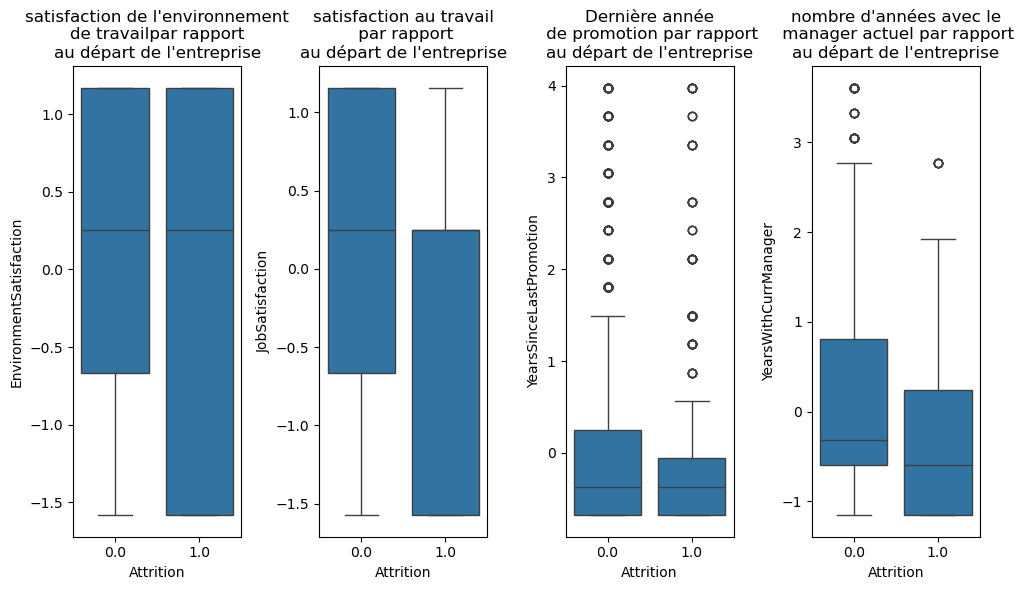

In [305]:
fig, axes = plt.subplots(1, 4, figsize=(10, 6))

# Boxplot de la la satisfaction au travail par rapport au départ de l'entreprise
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=merged_scaled_df, ax=axes[0])
axes[0].set_title("satisfaction de l'environnement\nde travailpar rapport\nau départ de l'entreprise")

# Boxplot de la satisfaction au travail par rapport au départ de l'entreprise
sns.boxplot(x='Attrition', y='JobSatisfaction', data=merged_scaled_df, ax=axes[1])
axes[1].set_title("satisfaction au travail\n par rapport\nau départ de l'entreprise") 

# Boxplot de la dernière année depuis la dernière promotion par rapport au départ de l'entreprise
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=merged_scaled_df, ax=axes[2])
axes[2].set_title("Dernière année\n de promotion par rapport\nau départ de l'entreprise") 

# Boxplot du nombre d'années avec le manager actuel par rapport au départ de l'entreprise
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=merged_scaled_df, ax=axes[3])
axes[3].set_title("nombre d'années avec le\n manager actuel par rapport\nau départ de l'entreprise")
plt.tight_layout()
plt.show()

#### Observations

On peut observer que les employés qui ont quitté l'entreprise semblent avoir une satisfaction de l'environnement de travail plus faible en moyenne, tout comme la satisfaction au travail et le nombre d'années avec le manager actuel. De plus, les employés qui ont quitté l'entreprise ont passé plus de temps depuis leur dernière promotion.

Ces observations suggèrent que la satisfaction au travail, le nombre d'années avec le manager actuel et la fréquence des promotions peuvent influencer la décision des employés de quitter l'entreprise.

# Modèles d'intelligence articielle

Nous avons considéré plusieurs modèles d'intelligence artificielle que nous avons comparés afin de déterminer le modèle le plus adapté dans notre situation : 
- *Perceptron*
- *Logistic Regression*
- *Support Vector Machine (SVM)*
- *K-Neighbors (KNN)*
- *Naive Bayes*
- *Decision Tree*
- *Random Forest*

Ces différentes modèles seront compararés d'après les critères suivants :
- Performance du modèle :
  - Précision (*precision*)
  - Rappel (*recall*)
  - F1-Score
  - Matrice de confusion
  - ROC (*Receiver Operating Characteristic*)
  - AUC (*Area Under the Curve*)
- Temps d'exécution
<!-- - Explicabilité : Nous donnerons arbitrairement un score d'explicabilité en fonction de notre compréhension du modèle. -->

## Définition des modèles

### Numerical Regression

#### Définition:

La régression numérique dans un modèle d'intelligence artificielle (IA) désigne une tâche ou une méthode d'apprentissage supervisé utilisée pour prédire une variable continue à partir d'un ensemble de données d'entrée. Contrairement à la classification, qui vise à attribuer des catégories ou des classes discrètes, la régression produit des valeurs numériques continues.

#### Fonctionnement:
Le fonctionnement de la régression linéaire est assez simple. 
La première étape comme dans tous modèle de prédiction de données consiste à transformer les données de type caractère en données numérique afin que le système puisse réaliser des calculs sur ces dernières.

La seconde étape sera d'indentifier l'allure de nos données que nous regrouperons dans trois différentes catégories. 

La première, la régression linéaire où la courbe de sortie suivra une fonction $ ax + b$.
cette dernière se calcul alors avec la formule suivante:
$$ y = \beta_0 + \beta_1x + \epsilon $$
La seconde, la régression polynomiale sera pour des données formant une courbe de forme: 
$$ ax^n + bx^{n-1} + ... + K $$
Cette dernière se calcul via la formule suivant:
$$ y= \beta_0 + \beta_1x +\beta_2x^2 + ... + \beta_nx^n $$

Et enfin, la courbe sigmoïdale est une courbe en forme de $S$ étiré d'équation générale : 
$$S(x)= \frac{1}{1+e^{-x}} $$ 
elle se calcule de la manière suivante :  
$$ P(y = \frac{1}{X}) = \frac{1}{1+e^{-(\beta_0 + \beta_1x)}} $$ 


#### Avantages et inconvénients: 
##### Avantages
- Simplicité: Les modèles comme la régression linéaire sont faciles à comprendre, à implémenter et à interpréter.Ils sont adaptés aux relations linéaires simples entre les variables.
- Flexibilité: Les modèles avancés (régression polynomiale, réseaux de neurones) peuvent capturer des relations complexes entre les données.
- Précision sur des données continues: Fournit une estimation précise de valeurs continues, ce qui est utile pour les prévisions et les analyses quantitatives.
- Efficacité pour des petits ensembles de données: Les approches simples, comme la régression linéaire, fonctionnent bien même avec peu de données.
- Utilisation généralisée :Les outils et frameworks pour la régression numérique sont largement disponibles (scikit-learn, TensorFlow, PyTorch, etc.).

##### Inconvénients
- Hypothèses fortes (pour certains modèles): La régression linéaire suppose une relation linéaire entre les variables, ce qui n’est pas toujours le cas.
- Sensibilité aux valeurs aberrantes: Les modèles comme la régression linéaire peuvent être fortement influencés par des outliers (valeurs extrêmes), ce qui peut fausser les résultats.
- Sur-apprentissage: Avec des modèles trop complexes (comme la régression polynomiale ou les réseaux de neurones), il y a un risque de sur-ajustement aux données d'entraînement, ce qui réduit la généralisation sur des données nouvelles.
- Dépendance à la qualité des donnée: Les modèles de régression nécessitent des données bien préparées (sans valeurs manquantes, correctement échelonnées, etc.), sinon les performances peuvent être affectées.
- Complexité des modèles avancés: Les modèles plus puissants, comme les réseaux de neurones pour la régression, nécessitent plus de données et de calculs, et leur interprétation est souvent plus difficile.
- Incapacité à gérer des données catégoriques sans prétraitement: Les variables catégoriques doivent être converties (par exemple en variables dummy ou one-hot encoding), ce qui ajoute une étape supplémentaire.

### Logistic Regression

#### Définition:

La régression logistique est une méthode statistique ou d'apprentissage machine utilisée pour modéliser et analyser les relations entre une ou plusieurs variables indépendantes et une variable à prédire. L'objectif est de prédire une valeur continue.
Il s'agit plus simplement de déterminer une formule de prédiction tandant à ce rapprocher des résultats des données réelles.

#### Fonctionnement:
La régression logistique utilise la fonction logistique ou sigmoïde pour transformer la sortie de la régression linéaire en une probabilité.

La fonction logistique est définie comme suit :
$\sigma(z) = \frac{1}{1 + e^{-z}}$

En régression logistique, \( z \) est une combinaison linéaire des caractéristiques :
$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Où :
- $\beta_0$ est l'ordonnée à l'origine (intercept)
- $\beta_1, \beta_2, \ldots, \beta_n$ sont les coefficients des caractéristiques $x_1, x_2, \ldots, x_n $

La probabilité que l'événement se produise (par exemple, \( y = 1 \)) est alors donnée par :
$P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}$

#### Fonction de Coût

La fonction de coût utilisée pour ajuster les paramètres de la régression logistique est la log-vraisemblance, définie comme suit :
$J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] $

Où :
- $m$ est le nombre d'échantillons
- $y^{(i)}$ est la valeur réelle pour l'échantillon $i$
- $\hat{y}^{(i)}$ est la probabilité prédite pour l'échantillon $i$


#### Avantages et inconvénients: 
##### Avantages
- Simplicité et interprétabilité : Les coefficients de la régression logistique sont faciles à interpréter, ce qui permet de comprendre l’impact de chaque variable indépendante sur la variable dépendante.
- Efficacité pour les problèmes binaires : Elle est particulièrement efficace pour les problèmes où la variable dépendante est binaire (oui/non, vrai/faux).
- Moins de prérequis : Contrairement à d’autres modèles, la régression logistique ne nécessite pas que les variables indépendantes soient normalement distribuées.

##### Inconvénients
- Limitation aux problèmes binaires : La régression logistique standard est limitée aux problèmes de classification binaire. Pour les problèmes multi-classes, des extensions comme la régression logistique multinomiale sont nécessaires.
- Sensibilité aux valeurs aberrantes : Les valeurs aberrantes peuvent avoir un impact significatif sur les coefficients estimés.
- Supposition de linéarité : Elle suppose une relation linéaire entre les variables indépendantes et le log-odds de la variable dépendante, ce qui peut ne pas toujours être le cas.
- Besoin de grandes quantités de données : Pour des performances optimales, la régression logistique nécessite un grand nombre de données.


### K-Neighbors (KNN)

#### Définition:

Le modèle K-Nearest Neighbors (KNN) est un algorithme d'apprentissage supervisé utilisé pour les problèmes de classification et de régression. Il est basé sur l'idée que des points proches dans un espace de caractéristiques ont des résultats similaires.

#### Fonctionnement:


Le K-Neighbors (KNN) est un algorithme d'apprentissage supervisé utilisé à la fois pour des tâches de classification et de régression. Il est simple à comprendre et à implémenter, mais peut être puissant lorsqu'il est appliqué à des données adaptées. Voici une explication détaillée de son fonctionnement et de ses caractéristiques :

###### Principe de base 
Le KNN repose sur l'idée que des données similaires se trouvent à proximité dans l'espace des caractéristiques. En d'autres termes, pour prédire la classe ou la valeur d'un échantillon inconnu, l'algorithme examine les $ K $ voisins les plus proches de cet échantillon dans les données d'entraînement.


###### Étapes principales :
1. Stocker les données d'entraînement :
   - Contrairement à d'autres modèles qui apprennent des paramètres pendant la phase d'entraînement, le KNN stocke simplement les données d'entraînement.
   
2. Calculer la distance :
   - Pour chaque point de données à prédire, KNN mesure la distance entre ce point et tous les points de l'ensemble d'entraînement. 
   - Les distances les plus courantes :
     - Distance euclidienne : $ ( d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} ) $
     - Distance de Manhattan : $ ( d(x, y) = \sum_{i=1}^{n} |x_i - y_i| ) $
     - Distance de Minkowski (généralisation des deux précédentes).

3. Trouver les $ K $ voisins les plus proches :
   - Une fois les distances calculées, l'algorithme sélectionne les $ K $ points d'entraînement les plus proches du point à prédire.

4. Prédire :
   - Classification : L'étiquette est déterminée par un vote majoritaire parmi les K voisins.
     - Par exemple, si $ ( K = 5 ) $ et 3 voisins sont de la classe $ A $ et 2 de la classe $ B $, le point est classé comme $ A $.
   - Régression : La valeur prédite est la moyenne ou la médiane des valeurs des $ K $ voisins.


Paramètre clé :
- Petit $ K $:
  - Plus sensible au bruit des données (peut surapprendre).
  - Exemple : Avec $ ( K = 1 ) $, un point peut être influencé uniquement par son plus proche voisin, même si ce voisin est une anomalie.
  
- Grand $ K $ :
  - Plus robuste au bruit, mais peut perdre des détails et créer un modèle trop simplifié.
  - Exemple : Si $ K $ est trop grand, l'algorithme peut ignorer des groupes locaux pertinents.

- Choisir $ K $ est souvent fait via des techniques comme la validation croisée.


#### Avantages et inconvénients:

###### Avantages :

- **Simple à comprendre et à implémenter**.
- **Pas de phase d'apprentissage complexe** : Pas besoin d'optimiser de paramètres comme dans les modèles plus sophistiqués.
- **Performant pour des jeux de données petits ou des données où les frontières entre classes sont bien définies**.

###### Inconvénients du KNN
- **Lent pour des grands ensembles de données** :
        KNN doit calculer les distances pour chaque point, ce qui peut être coûteux en temps pour de grandes bases de données.

- **Sensibilité à l'échelle des données** :
        Les caractéristiques avec de grandes valeurs peuvent dominer les calculs de distance. Il est donc crucial de **normaliser ou standardiser** les données.
- **Sensibilité au choix de $ K $ et à la définition de la distance** :
        Un mauvais choix peut conduire à de mauvaises performances.
- **Consommation de mémoire** :
        Comme il stocke toutes les données d'entraînement, il peut être gourmand en mémoire.

#### Définition:

Le modèle Naïve Bayes est une famille d'algorithmes d'apprentissage supervisé basés sur le théorème de Bayes, avec une hypothèse fondamentale de "naïveté" : toutes les variables prédictives sont supposées indépendantes les unes des autres, conditionnellement à la classe cible. Malgré cette simplification, le modèle est souvent performant pour les problèmes de classification, notamment avec des données textuelles.

#### Fonctionnement:

##### Théorème de Bayes
Le théorème de Bayes exprime la probabilité d'une classe $ C $ donnée un ensemble de caractéristiques $ X $: $ P(C|X) = \frac{P(X|C)*P(C)}{P(X)} $

Où :

$ P(C∣X) $ est la probabilité a posteriori de la classe $ C $, sachant les caractéristiques $ X $

$ P(X∣C) $ est la probabilité des caractéristiques $ X $ sous la classe $ C $

$ P(C) $ est la probabilité a priori de la classe $ C $

$ P(X) $ est la probabilité des caractéristiques $ X $ 

##### Hypothèse de Naïveté

Le modèle suppose que les caractéristiques $ X = x_{1},x_{2},...,x_{n} $ sont indépendantes conditionnellement à la classe $ C $. Cela simplifie alors le calcul de $ P(X|C) $ en produit de probabilité individuelle:

$$ P(X|C) = P(x_{1}|C)*P(x_{2}|C)*...*P(x_{n}|C)$$

Cette hypothèse est rarement vraie en pratique, mais elle fonctionne bien dans de nombreux cas.

##### Types de Modèles Naïve Bayes

Il existe alors 3 modèles découlant du théorème de bayes :

- Gaussian Naïve Bayes : Utilisé pour les données numériques continues, en supposant que chaque caractéristique suit une distribution normale.

- Multinomial Naïve Bayes : Adapté aux données discrètes, souvent utilisé pour la classification de textes, comme l'analyse de sentiments ou la détection de spam.

- Bernoulli Naïve Bayes : Conçu pour les données binaires, par exemple pour détecter la présence ou l'absence de mots dans un document.

#### Avantages et inconvénients : 
##### Avantages :
- Simple à implémenter et très rapide à entraîner.
- Fonctionne bien avec des grands ensembles de données.
- Peu sensible aux données manquantes.
- Performant pour les problèmes de classification de texte et les systèmes de recommandation.

##### Inconvénients :
- L'hypothèse d'indépendance conditionnelle est souvent irréaliste dans les données réelles, ce qui peut affecter la précision du modèle.
- Ne prend pas en compte les interactions entre les caractéristiques.
- Les probabilités prédites peuvent être moins précises comparées à d'autres modèles de classification sophistiqués.

### Support Vector Machine (SVM)

#### Définition:

Une machine à vecteurs de support (SVM) est un algorithme d’apprentissage supervisé utilisé pour la classification et la régression. Les SVM fonctionnent en trouvant un hyperplan optimal qui sépare les différentes classes de données dans un espace à n dimensions.

#### Fonctionnement:
Les machines à vecteurs de support (SVM) fonctionnent en trouvant un hyperplan optimal qui sépare les différentes classes de données dans un espace à n dimensions. 

- Séparation linéaire : Les SVM cherchent à trouver l’hyperplan qui maximise la marge entre les classes. La marge est la distance entre l’hyperplan et les points de données les plus proches de chaque classe, appelés vecteurs de support. Dans un problème de classification binaire, l'hyperplan est défini par l'équation :

    $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = 0$
- Fonctions noyau : Lorsque les données ne sont pas linéairement séparables, les SVM utilisent des fonctions noyau pour transformer les données dans un espace de dimension supérieure où une séparation linéaire est possible. Les noyaux couramment utilisés incluent les noyaux linéaires, polynomiaux, à fonction de base radiale (RBF) et sigmoïdes.
- Optimisation : Le problème de classification est reformulé en un problème d’optimisation quadratique, ce qui permet de trouver l’hyperplan optimal de manière efficace. En somme, il revient à résoudre le problème d'optimisation suivant:
$\text{Minimiser} \ \frac{1}{2} \|\beta\|^2$

Sous les contraintes :

$y^{(i)} (\beta_0 + \beta_1 x_1^{(i)} + \beta_2 x_2^{(i)} + \ldots + \beta_n x_n^{(i)}) \geq 1 \ \text{pour tous les} \ i $

#### Avantages et inconvénients : 
##### Avantages :
- Efficace dans les espaces de haute dimension
- utilise un sous-ensemble des points d'entraînemen (vecteurs de support) pour la fonction de décision, ce qui le rend efficace en termes de mémoire
- lexible grâce à l'utilisation de différentes fonctions noyau

##### Inconvénients :
- Performance sensible au choix des hyperparamètres et du noyau
- Complexité de l'entraînement augmente avec la taille du jeu de données
- Interprétation des résultats moins intuitive que pour certains autres modèles

### Decision Tree

#### Définition:

Un modèle d'arbre de décision en IA est un algorithme d'apprentissage supervisé utilisé pour la classification ou la régression. Il représente les décisions sous forme d'une structure arborescente, où chaque nœud interne correspond à un test sur une caractéristique, chaque branche à un résultat de test, et chaque feuille à une prédiction ou une classe. L'arbre est construit pour minimiser l'erreur en partitionnant les données selon des critères comme l'entropie ou le gain d'information, facilitant des décisions compréhensibles et explicables.

#### Fonctionnement:

Le fonctionnement de l'arbre de décision, consiste en la mise en place de différentes sorties en fonction de différentes valeurs de données. Pour cela le système viens séparer en un maximum de tests possible les différents hyperparamètres.
Pour cela, notre système va créer des tests $ x_{n} $ qui mit successivement vont venir déterminer la classe dans laquelle va se retrouver notre sujet pour lui appliquer une action, comme nous pouvons le voir sur l'image ci-dessous. Cette dernière peut se caractériser par l'application du formule ou par une action simple comme la mise en spam d'un mail.
<div style="text-align: center" >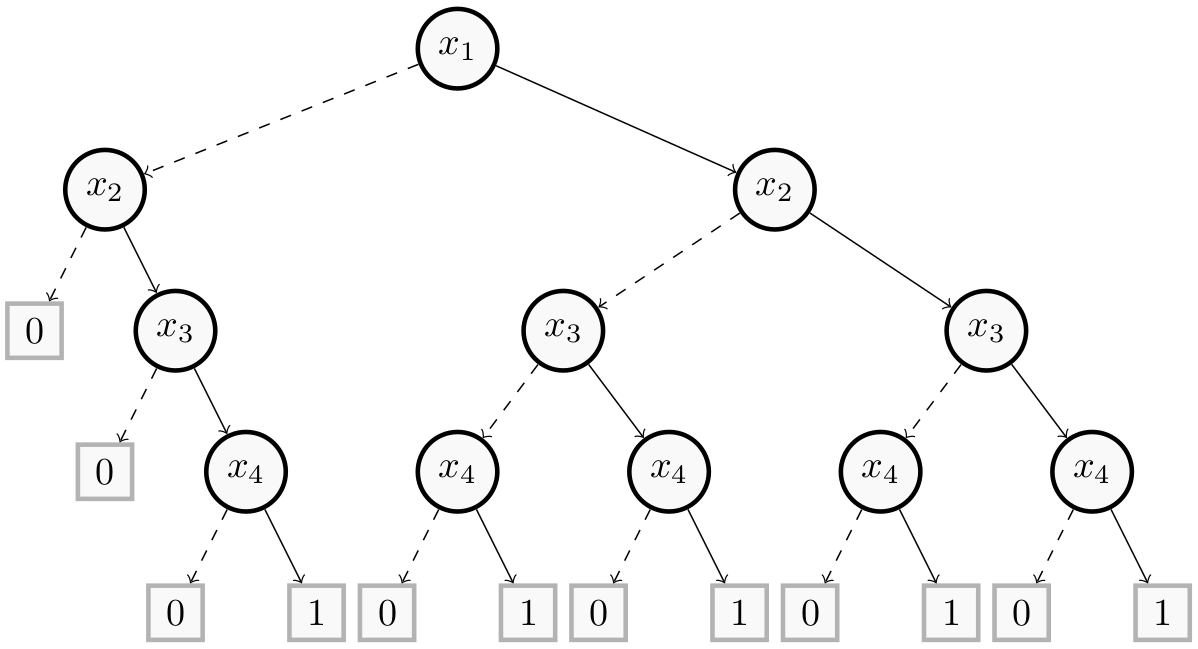</div>
<div style="text-align: center"> image tiré de: <a href="https://www.cril.univ-artois.fr/pyxai/assets/n
                                                    otebooks/figures/DTdirect.png"> ce site</a> </div>

#### Avantages et inconvénients : 
##### Avantages :
- **Interprétabilité** : Les arbres de décision sont faciles à visualiser et à interpréter.
- 
- **Pas de Prétraitement des Données** : Peuvent gérer des données numériques et catégoriques sans nécessiter de prétraitement.
- **Manipulation des Données Manquantes** : Peut gérer des valeurs manquantes en utilisant des mécanismes comme la pondération des chemins de décision.
- **Robustesse** : Peuvent capturer des interactions non linéaires entre les caractéristiques.

##### Inconvénients :
- **Surapprentissage** : Les arbres de décision peuvent facilement surapprendre les données d'entraînement, surtout lorsqu'ils sont profonds.
- **Variance Élevée** : Sensibles aux variations dans les données d'entraînement. Des changements mineurs peuvent entraîner des arbres complètement différents.
- **Biais** : Tendent à privilégier les caractéristiques avec de nombreuses valeurs distinctes.


### Random Forest 

#### Définition:
Une **random forest** (ou forêt aléatoire) est un algorithme d’apprentissage supervisé utilisé pour la classification et la régression. Elle repose sur la combinaison de plusieurs arbres de décision pour améliorer la précision et la robustesse des prédictions.

#### Fonctionnement:
Une forêt aléatoire est constituée de nombreux arbres de décision indépendants, chacun construit sur un échantillon aléatoire des données d'entraînement et utilisant un sous-ensemble aléatoire des caractéristiques pour chaque division de l'arbre. Les prédictions de tous les arbres sont ensuite combinées pour produire une seule prédiction finale.  Voici comment construire une forêt aléatoire: 
- Échantillonnage Bootstrap : Chaque arbre utilise un échantillon aléatoire avec remplacement des données d’entraînement, ce qui permet à certains exemples d’être sélectionnés plusieurs fois.
- Sélection de Sous-ensembles de Caractéristiques : À chaque nœud, un sous-ensemble aléatoire de caractéristiques est choisi pour déterminer la meilleure division.
- Construction des Arbres : Les arbres sont construits jusqu’à leur complétion sans élagage, capturant des modèles complexes.
- Agrégation des Prédictions : En classification, chaque arbre vote pour une classe, et la classe avec le plus de votes est choisie. En régression, la moyenne des prédictions est utilisée.


<div style="text-align: center" >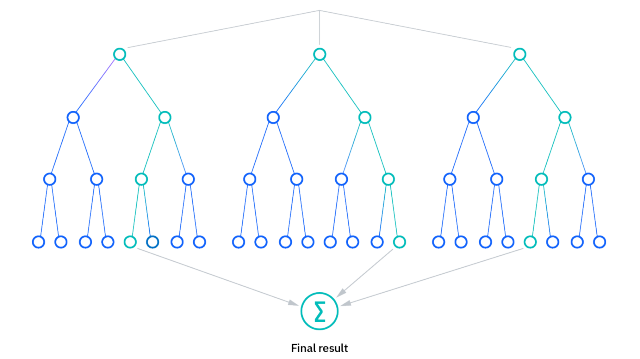</div>
<div style="text-align: center"> tiré de: <a href="https://www.ibm.com/fr-fr/topics/random-forest"> ce cours</a> </div>


#### Avantages et inconvénients :

##### Avantages :
- **Réduction du Surapprentissage** : En combinant les prédictions de plusieurs arbres, les forêts aléatoires réduisent le risque de surapprentissage par rapport aux arbres de décision individuels.
- **Robustesse** : Insensibles aux variations dans les données d'entraînement. Les forêts aléatoires sont moins sensibles aux fluctuations dans les données d'entraînement.
- **Gestion des Caractéristiques** : Capables de gérer un grand nombre de caractéristiques et de déterminer les plus importantes.
- **Manipulation des Données Manquantes** : Peuvent gérer des valeurs manquantes en imputant des valeurs basées sur les arbres de la forêt.

##### Inconvénients :
- **Complexité et Temps de Calcul** : Les forêts aléatoires nécessitent plus de temps de calcul et de mémoire par rapport aux arbres de décision individuels, surtout lorsque le nombre d'arbres est élevé.
- **Interprétabilité** : Moins interprétables que les arbres de décision individuels en raison de la combinaison de nombreux arbres.

### Perceptron

#### Définition:
Le perceptron est un algorithme d'apprentissage supervisé utilisé pour la classification binaire.<sup>[[3]](#ressource-3)</sup> Inventé en 1957 par Feank Rosenblatt, il s'agit du modèle de réseau de neurones artificiels le plus simple. Le perceptron est basé sur une combinaison linéaire des caractéristiques d'entrée et utilise une fonction de seuil pour produire une sortie binaire.

#### Fonctionnement:
- Entrées et Poids : Chaque entrée ( $X_i$ ) est associée à un poids ( $\beta_i$ ). Les poids sont ajustés pendant l’apprentissage pour améliorer la précision de la classification.
- Somme Pondérée : Les entrées sont multipliées par leurs poids respectifs et additionnées pour obtenir une somme pondérée $z$=( $\sum X_i \beta_i$ ).
- Fonction d’Activation : La somme pondérée est passée à travers une fonction d’activation, souvent une fonction de seuil (comme la fonction de Heaviside), qui décide de la sortie du perceptron. La fonction d'activation est définie comme suit: $\hat{y}^{(i)} = \begin{cases} 
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0 
\end{cases}$
- Si la prédiction s'avère fausse, alors on met à jour les poids avec la fonction suivante:
$\beta_j = \beta_j + \eta (y^{(i)} - \hat{y}^{(i)}) X_j^{(i)}$
Où $\eta$ est le taux d'apprentissage. 
- Sortie : La sortie est binaire (0 ou 1), indiquant à quelle classe l’entrée appartient. Si la somme pondérée dépasse un certain seuil, la sortie est 1, sinon elle est 0.

#### Avantages et inconvénients:
##### Avantages
- **Simplicité** : Le perceptron est facile à comprendre et à implémenter, ce qui en fait un bon point de départ pour apprendre les concepts de base des réseaux de neurones.
- **Efficacité** : Pour les problèmes linéairement séparables, le perceptron peut converger rapidement vers une solution.
- **Faible coût de calcul** : En raison de sa simplicité, le perceptron nécessite moins de ressources computationnelles par rapport à des modèles plus complexes.
##### Inconvénients
- **Limitation aux problèmes linéaires** : Le perceptron ne peut résoudre que des problèmes où les classes sont linéairement séparables. Il échoue sur des problèmes plus complexes.
- **Incapacité à gérer des données non linéaires** : Contrairement aux réseaux de neurones multicouches, le perceptron simple ne peut pas capturer des relations non linéaires dans les données.
- **Sensibilité aux données bruitées** : Le perceptron peut être influencé par des données bruitées ou des valeurs aberrantes, ce qui peut affecter sa performance.

## Comparaison

Dans notre cas, nous nous trouvons dans une application de type classification. En effet, nous devons pouvoir mettre en place un modèle qui déterminera si l'employer est susceptible de quitter ou non l'entreprise afin de proposer des mesures pour de le conserver dans la société.</br>
La classe à déterminer sera alors le départ de l'entreprise avec la réponse oui ou non.</br>
De ce fait, les modèles de régression numérique ne seront ainsi pas utilisés, car ces dernières ne sont pas compatibles avec une application de classification. 

Pour faire une comparaison des modèles, nous avons décidé de faire un entrainement préliminaire sur l'ensemble de ces modèles afin d'obtenir des métriques comme la précision ou l'AUC. Nous complèterons ensuite cet entrainement sur le modèle que nous choisirons.

# Implémentation des différents modèles

## Préparation des données d'apprentissage et de test

In [306]:
# Définition des variables d'apprentissage et de test
X = merged_scaled_df.drop("Attrition", axis=1)
y = merged_scaled_df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

## Testing de nos modèles

Afin de pouvoir déterminer l'efficacité de nos modèles, nous allons devoir nous appuyer sur des valeurs que nous allons calculer. Ces derniers sont au nombre de 4 que nous allons détailler ci-dessous.

##### 1. Précision (Accuracy)
La précision est le ratio du nombre de prédictions correctes sur le nombre total de prédictions.

$
\text{Précision} = \frac{\text{Nombre de prédictions correctes}}{\text{Nombre total de prédictions}}
$

##### 2. Précision (Precision)
La précision est le ratio des vraies positives (VP) sur la somme des vraies positives (VP) et des fausses positives (FP).

$
\text{Précision} = \frac{VP}{VP + FP}
$

##### 3. Rappel (Recall)
Le rappel est le ratio des vraies positives (VP) sur la somme des vraies positives (VP) et des fausses négatives (FN).

$
\text{Rappel} = \frac{VP}{VP + FN}
$

##### 4. F1-Score
Le F1-score est la moyenne harmonique de la précision et du rappel, offrant un équilibre entre les deux.

$
\text{F1-Score} = 2 \times \frac{\text{Précision} \times \text{Rappel}}{\text{Précision} + \text{Rappel}}
$

<!-- models = {
    "Perceptron": Perceptron(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=RANDOM_SEED),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=RANDOM_SEED),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
}

comp_table_data = {
    "AUC": {},	
    "F1-Score": {},	
    "Temps d\'entrainement": {},	
    "Temps de prédiction": {},	
    "Matrice de confusion": {}
}
    
def test_models(X_train, X_test, y_train, y_test):
    columns = 3
    rows = 3
    
    # Entraînement et prédiction
    predictions = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions[name] = (model.predict(X_test), model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test))

    widget = widgets.Tab()
    titles, children = [], []

    # Affichage les résultats de chaque modèle de prédictions
    for name, pred in predictions.items():
        y_pred, y_proba = pred 
        titles.append(name)
        children.append(widgets.Output())
        matrix = confusion_matrix(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)
        f1 = f1_score(y_test, y_pred)
        comp_table_data["AUC"][name] = (auc, auc)
        comp_table_data["F1-Score"][name] = (f1, f1)
        comp_table_data["Matrice de confusion"][name] = (matrix, -matrix[1][0])
        with children[-1]:
            print("Matrice de Confusion :\n", matrix)
            print("Rapport de Classification :\n", classification_report(y_test, y_pred))
            print("AUC-ROC :", auc)

    widget.children, widget.titles = children, titles
    
    display(widget)

    # Affichage des matrices de confusion pour chaque modèle
    fig, axes = plt.subplots(columns, rows, figsize=(20, 15))
    for i, prediction in enumerate(predictions.items()):
        name, pred = prediction
        y_pred, y_proba = pred
        ax = axes.flatten()[i]
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", ax=ax)
        ax.set_title(name)
        ax.set_xlabel("Valeurs Prédites")
        ax.set_ylabel("Valeurs Réelles")
    
    for i in range(len(predictions), columns * rows):
        fig.delaxes(axes.flatten()[i])
    plt.tight_layout()

test_models(X_train, X_test, y_train, y_test) -->

In [307]:
models = {
    "Perceptron": Perceptron(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=RANDOM_SEED),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=RANDOM_SEED),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
}

comp_table_data = {
    "AUC": {},	
    "F1-Score": {},	
    "Temps d\'entrainement": {},	
    "Temps de prédiction": {},	
    "Matrice de confusion": {}
}
    
def test_models(X_train, X_test, y_train, y_test):
    columns = 3
    rows = 3
    
    # Entraînement et prédiction
    predictions = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions[name] = (model.predict(X_test), model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test))

    widget = widgets.Tab()
    titles, children = [], []

    # Affichage les résultats de chaque modèle de prédictions
    for name, pred in predictions.items():
        y_pred, y_proba = pred 
        titles.append(name)
        children.append(widgets.Output())
        matrix = confusion_matrix(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)
        f1 = f1_score(y_test, y_pred)
        comp_table_data["AUC"][name] = (auc, auc)
        comp_table_data["F1-Score"][name] = (f1, f1)
        comp_table_data["Matrice de confusion"][name] = (matrix, -matrix[1][0])
        with children[-1]:
            print("Matrice de Confusion :\n", matrix)
            print("Rapport de Classification :\n", classification_report(y_test, y_pred))
            print("AUC-ROC :", auc)
            
            cm = confusion_matrix(y_test, y_pred)
            plt.figure()
            sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
            plt.title(name)
            plt.xlabel("Valeurs Prédites")
            plt.ylabel("Valeurs Réelles")
            plt.show()
            
    widget.children, widget.titles = children, titles
    display(widget)    

test_models(X_train, X_test, y_train, y_test)

### Comparaison de l'efficacité des différents modèles 

Dans le but de continuer notre étude et de déterminer le modèle que nous allons utiliser, nous allons tracer la courbe ROC contenant chacun de nos modèles. Grâce à la courbe ROC, nous allons pouvoir déterminer l'AUC qui est l'aire sous la courbe.    

La courbe ROC est un graphique qui montre la performance d'un modèle de classification pour différents seuils de discrimination. Elle trace le taux de vrais positifs (True Positive Rate, TPR) contre le taux de faux positifs (False Positive Rate, FPR).

- **Taux de Vrais Positifs (TPR)** : C'est le rappel.

$
TPR = \frac{VP}{VP + FN}
$

- **Taux de Faux Positifs (FPR)** : C'est le ratio des fausses positives sur la somme des vraies négatives et des fausses positives.

$
FPR = \frac{FP}{FP + VN}
$

L'AUC est l'aire sous la courbe ROC. Elle mesure la capacité du modèle à distinguer entre les classes positives et négatives. Une AUC de 1.0 indique un modèle parfait, tandis qu'une AUC de 0.5 indique un modèle qui ne fait pas mieux qu'un choix aléatoire.

- **Interprétation de l'AUC** :
  - **0.9 - 1** : Excellente performance
  - **0.8 - 0.9** : Bonne performance
  - **0.7 - 0.8** : Acceptable
  - **0.6 - 0.7** : Faible performance
  - **0.5 - 0.6** : Très faible performance

Les courbes ROC et les scores AUC sont des outils précieux pour comparer les performances de différents modèles de classification, en particulier dans des situations où les classes sont déséquilibrées. <sup>[[4]](#ressource-4)</sup> 

En utilisant ces métriques et outils, nous pouvons évaluer de manière exhaustive la performance de nos modèles de classification et choisir celui qui est le mieux adapté à notre problème.

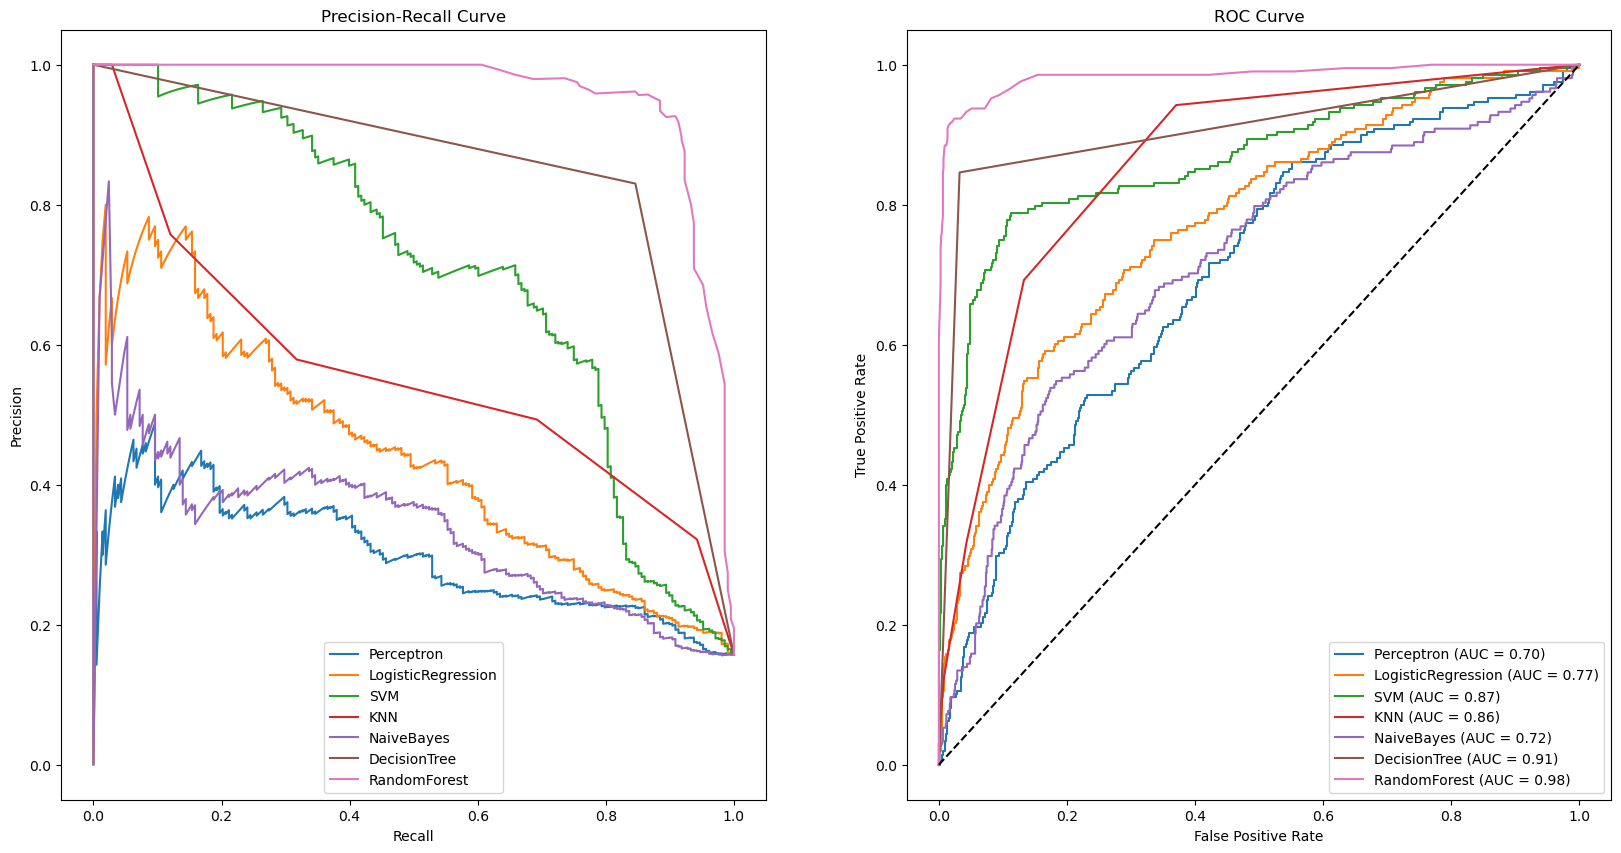

In [308]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Tracer les courbes de Précision-Rappel
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    # Utilisation de decision_function pour prédire un score de décision pour le Perceptron car le Perceptron ne produit pas de valeur de probabilité
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
        
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    axes[0].plot(recall, precision, label=f"{name}")

axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision-Recall Curve')
axes[0].legend()

# Tracer les courbes ROC
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
        
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    axes[1].plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()

plt.show()

### Analyse du temps d'exécution

Pour nous rendre compte de la performance de nos modèles, nous allons analyser leur temps d'entrainement et leur temps de prédiction. Avec ces valeurs nous pourrons déterminer si des modèles ne sont pas optimisés pour s'entrainer sur de grands jeux de données.

In [309]:
training_times = []
prediction_times = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_times.append(time.time() - start_time)
    comp_table_data["Temps d'entrainement"][name] = (training_times[-1], -training_times[-1])

    start_time = time.time()
    model.predict(X_test)
    prediction_times.append(time.time() - start_time)
    comp_table_data["Temps de prédiction"][name] = (prediction_times[-1], -prediction_times[-1])
    
time_df = pd.DataFrame({
    'Model': models.keys(),
    'Training Time (s)': training_times,
    'Prediction Time (s)': prediction_times
}).set_index('Model')
print(time_df)

                    Training Time (s)  Prediction Time (s)
Model                                                     
Perceptron                   0.004434             0.001226
LogisticRegression           0.017794             0.001133
SVM                          1.834795             0.138686
KNN                          0.001944             0.066951
NaiveBayes                   0.003616             0.001466
DecisionTree                 0.036711             0.001311
RandomForest                 0.450853             0.016046


### Analyse des résultats

Précédemment, nous avons évoqué les variables d'évaluation de nos modèles. Nous allons donc nous servir des valeurs obtenues avec nos modèles pour les évaluer.
- **Perceptron :** Pour le Perceptron, dans notre rapport de classification nous avons 0.90 de Precision, 0.77 de Recall et 0.83 de F1-Score. Ce qui ici nous intéresse est le F1-Score qui a un score assez élevé mais nous pensons que nous pouvons avoir mieux. En observant ensuite l'AUC, la valeur est de 0.73 qui est une bonne valeure mais nous pouvons obtenir de meilleurs résultats avec d'autres modèles.
- **Logistic Regression :** Le modèle de régression logisitique obtient un F1-score de 0.91 qui est très bon mais si on s'intéresse à la matrice de confusion, on voit que le nombre de faux négatifs est de 173 ce qui est beaucoup. En s'intéressant a l'AUC on voit une valeur de 0.77 qui est mieux que le Perceptron mais nous pouvons obtenir de meilleurs résultats avec d'autres modèles.
- **SVM :** Quant au modèle SVM, on remarque une précision de 0.90, un recall de 0.99 et un F1-Score de 0.94. Si on s'intéresse à l'AUC, on remarque qu'il a une valeur de 0.92; ce qui pourrait signifier qu'il est meilleur d'un point de vue performance que le perceptron et la regréssion logistique. Mais étant donné qu'il a un temps d'entrainement et de prédiction beaucoup plus long que le reste, on peut dire qu'il est le plus lent.
- **KNN :** Le modèle K-Nearest Neighbour a un AUC de 0.83, mais si on regarde la précision, il est à 0.86, le recall de 0.91 et le F1-Score de 0.89. Son temps d'entrainement est 0.001884, donc il est le plus rapide à entrainer mais n'a pas de meilleures performances que le SVM.
- **NaiveBayes :** Le NaiveBayes, si on s'intéresse uniquement à la courbe ROC, on peut remarquer qu'il a une performance plutot basse (avec l'AUC à 0.72), c'est le pire modèle d'un point de vue performance; mais il est plus rapide pour prédire des valeurs que le SVM, KNN.
- **DecisionTree :** L'arbre de décision a son AUC à 0.92, mais sa précision est de 0.98 son recall 0.99 et son F1-Score est de 0.98. Ce qui veut dire que ce modèle, d'un point de vue performance, est le meilleur que ceux d'avant.
- **RandomForest :** Le random Forest, a une AUC de 0.99; c'est le meilleur modèle d'un point de vue performance. Son temps d'entrainement est de 0,32s et son temps de prédiction est à 0.016s.

**Récapitulatif sous forme d'un tableau à double entrée** :

<!-- | Modèle             | AUC                |     F1-Score | Temps d'entrainement | Temps de prédiction |       Matrice de confusion      |
|:------------------ | ------------------:| ------------ | --------------------:| -------------------:|:-------------------------------:|
| Perceptron         | 0.7210244912038634 |         0.87 |             0.005195 |            0.001297 |    [[957 158]<br/>[121  87]]    |
| LogisticRegression | 0.7714341152121421 |         0.92 |             0.011158 |            0.001141 |  [[1086   29]<br/>[ 165   43]]  | 
| SVM                | 0.8726672990686443 |         0.94 |             1.825721 |            0.138554 |  [[1109    6]<br/>[ 142   66]]  |
| KNN                | 0.8622887202483616 |         0.93 |             0.001884 |            0.079221 |  [[1082   33]<br/>[ 136   72]]  |
| NaiveBayes         | 0.7162879441186616 |         0.89 |             0.003558 |            0.001700 |    [[996 119]<br/>[126  82]]    |
| DecisionTree       | 0.9195261296998966 |         0.98 |             0.023516 |            0.001552 |  [[1091   24]<br/>[  29  179]]  |
| RandomForest       | 0.9881273715074164 |         0.97 |             0.324209 |            0.015545 |  [[1115    0]<br/>[  79  129]]  | -->

In [310]:
def get_color_gradient(value: float, min_value: float = None, max_value: float = None) -> (int, int, int):
    """
    Retourne une couleur en fonction de la valeur donnée. La couleur est un gradient de bleu à rouge en passant par blanc.
    
    Couleurs : 
    Ratio  rouge  vert  bleu
        0    255     0     0
      0.5    255   255   255
        1      0     0   255
        
    Arguments : 
    - value (float) : Valeur à convertir en couleur ou un ratio correspondant à la valeur.
    - min_value (float) : Valeur minimale possible. Optionnel.
    - max_value (float) : Valeur maximale possible. Optionnel.
    
    Retourne :
    - str : Couleur en hexadécimal.
    
    Exemple :
    >>> get_color_gradient(0.5)
    "#FFFFFF"
    >>> get_color_gradient(0.75)
    "#FF8080"
    """
    if min_value and max_value:
        value = (value - min_value) / (max_value - min_value)
        
    if value < 0 or value > 1:
        raise ValueError("La valeur doit être comprise entre 0 et 1 ou les valeurs min_value et max_value doivent être renseignées.")
    
    r = min(255, int(value * 2 * 255))
    g = int(abs(1 - abs(1 - value * 2)) * 255)
    b = min(255, int((1 - value) * 2 * 255))
    
    return r, g, b

def show_comp_table(data: dict) -> None: 
    """
    Affiche un tableau de comparaison de modèles.
    
    Arguments :
    - data (dict) : Données à afficher.
        {
            "Nom de la métrique": {
                "Nom du modèle": (valeur à affichée, valeur à comparer),
            }
        }
                    
    Retourne :
    - None
    """
    
    html = "<div style='display:flex;gap:2rem;'><table>"
    html += "<tr><th>Métrique</th>"
    for model in data[list(data.keys())[0]]:
        html += f"<th>{model}</th>"
    html += "</tr>"

    for metric in data:
        html += f"<tr><td style='width:10rem;'>{metric}</td>"
        min_compare = min([compare for value, compare in data[metric].values()])
        max_compare = max([compare for value, compare in data[metric].values()])
        for model in data[metric]:
            value, compare = data[metric][model]
            r,g,b = get_color_gradient(compare, min_compare, max_compare)
            if isinstance(value, float):
                value = f"{value:.3f}"
            elif isinstance(value, np.ndarray):
                value = str(value).replace("\n", "<br>")
            html += f"<td style='background-color:rgba({r},{g},{b},0.75);width:8rem;'>{value}</td>"
        html += "</tr>"
        
    html += "</table><img style='height:15rem;' src=\"data:image/svg+xml;charset=UTF-8,%3csvg xmlns='http://www.w3.org/2000/svg' viewBox='10.498 8.636 362.1449 460.828' width='362.145px' height='460.828px'%3e%3cdefs%3e%3clinearGradient id='gradient-fill' x1='0%25' y1='0%25' x2='0%25' y2='100%25' gradientUnits='userSpaceOnUse'%3e%3cstop offset='0' stop-color='%230000ff'/%3e%3cstop offset='0.5' stop-color='%23ffffff'/%3e%3cstop offset='1' stop-color='%23ff0000'/%3e%3c/linearGradient%3e%3c/defs%3e%3crect width='108.432' height='460.828' fill='url(%23gradient-fill)' x='10.498' y='8.636' style=''/%3e%3ctext style='white-space: pre; fill: rgb(51, 51, 51); font-family: Arial, sans-serif; font-size: 28px;' x='127.596' y='41.19'%3eMoins bonne valeur%3c/text%3e%3ctext style='white-space: pre; fill: rgb(51, 51, 51); font-family: Arial, sans-serif; font-size: 28px;' x='130.473' y='246.805'%3eValeur moyenne%3c/text%3e%3ctext style='white-space: pre; fill: rgb(51, 51, 51); font-family: Arial, sans-serif; font-size: 28px;' x='128.797' y='459.473'%3eMeilleure valeur%3c/text%3e%3c/svg%3e\"/></div>"
    display(HTML(html))

In [311]:
show_comp_table(comp_table_data)

Métrique,Perceptron,LogisticRegression,SVM,KNN,NaiveBayes,DecisionTree,RandomForest
AUC,0.701,0.774,0.866,0.859,0.715,0.907,0.984
F1-Score,0.367,0.300,0.408,0.410,0.398,0.838,0.754
Temps d'entrainement,0.004,0.018,1.835,0.002,0.004,0.037,0.451
Temps de prédiction,0.001,0.001,0.139,0.067,0.001,0.001,0.016
Matrice de confusion,[[931 184] [120 88]],[[1085 30] [ 166 42]],[[1112 3] [ 154 54]],[[1067 48] [ 142 66]],[[997 118] [127 81]],[[1079 36] [ 32 176]],[[1115 0] [ 82 126]]


Ce tableau fait une comparaison des différents modèles en fonction : 
- du AUC (la plus grande valeur prime)
- du F1-Score (la plus grande valeur prime)
- du temps d'entrainement (la plus petite valeur prime)
- du temps de prédiction (la plus petite valeur prime)
- de la matrice de confusion (le nombre de faux positifs est utilisé pour la comparaison, la plus petite valeur prime)

## Conclusion de nos modèles

Au vu des résultats obtenus pour nos différents modèles, Decision Tree et Random Forest se démarquent particulièrement en analysant leur matrice de confusion. Ces deux modèles ont néanmoins des erreurs  sur les prédictions des faux négatifs, c'est-à-dire lorsqu'une personne qui part réellement est prédite comme ne partant pas. Ce type d'erreur est crucial à éviter dans notre contexte, car il peut avoir des impacts importants.  
En examinant leurs performances globales :
- F1-Score : Les deux modèles affichent des scores très élevés, à savoir 0,98 pour Decision Tree et 0,97 pour Random Forest.
- AUC (Area Under the Curve) : Ces modèles obtiennent également d'excellentes performances sur cette métrique, avec des scores respectifs de 0,94 et 0,99.
 
Après l'analyse de ces résultats, nous avons décidé de retenir le modèle **Random Forest**.  
Ainsi pour la suite du livrable nous allons entrainer notre modèle avec la méthode d'entrainement de **Validation Croisée**.


# Entrainement du modèle retenu

## Changement du mode d'entrainement

### Validation Croisée

Afin d'entrainer de manière plus approfondi notre modèle, nous allons changer le mode d'entrainement de notre modèle avec nos valeurs. 
La validation croisée est une méthode utilisée pour évaluer la performance d’un modèle tout en minimisant le risque de biais.<sup>[[7]](#ressource-7)</sup>
- **Division des données :** On divise l’ensemble des données en K groupes (appelés "folds") de manière aléatoire. Le paramètre K correspond au nombre de groupes choisis, généralement entre 5 et 10 selon la taille du jeu de données. Par exemple, si K = 10, les données sont séparées en 10 parties égales.
- **Entraînement et validation :** Le modèle est entraîné sur K-1 groupes (tous les groupes sauf un), et la performance est évaluée sur le groupe restant. Ce processus est répété K fois, chaque groupe servant une fois de validation.
- **Équilibre :**
    - Si K est trop grand, le modèle risque d’avoir une variance élevée et peut surajuster les données.
    - Si K est trop petit, la méthode se rapproche de la simple division "train-test" classique.
- **Performance finale :** À la fin des K itérations, on calcule la moyenne des scores obtenus sur chaque groupe pour obtenir une évaluation globale de la performance du modèle.
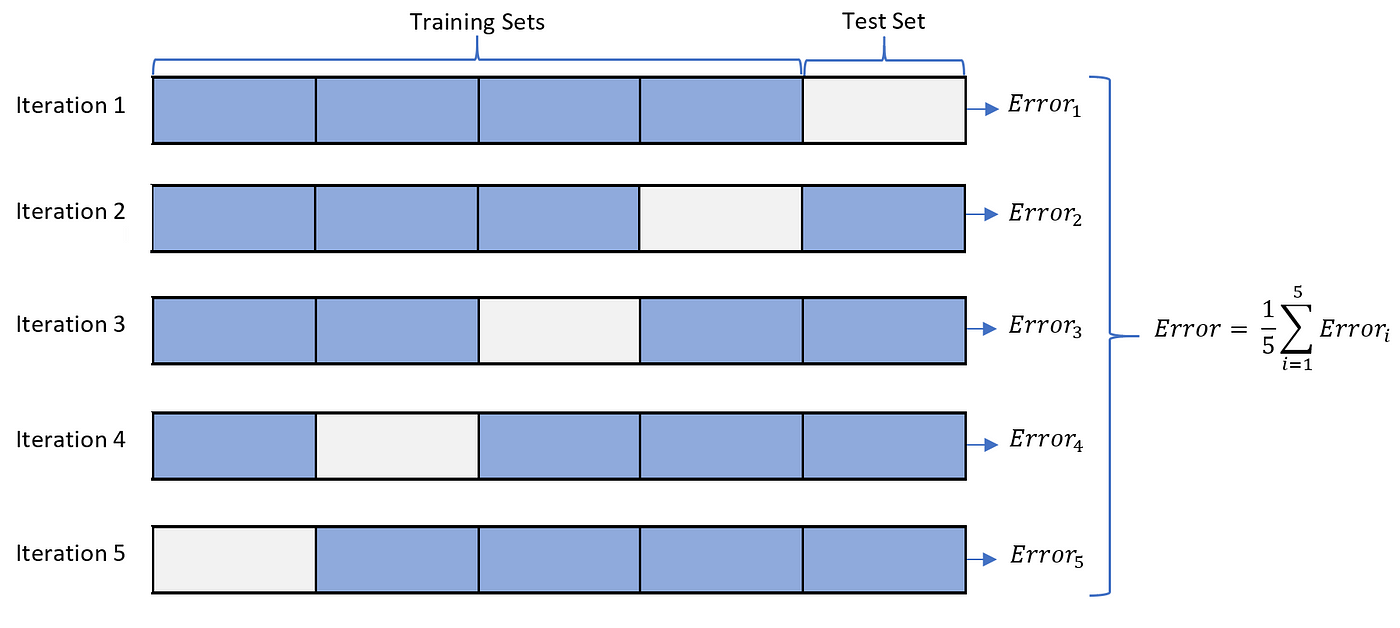

In [312]:
model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)

scores = cross_val_score(model, X, y, cv=10)
print("Scores: ", scores) 
print("Score moyen :", np.mean(scores))
print("Écart-type des scores :", np.std(scores))

Scores:  [0.98639456 0.97278912 0.98639456 0.97959184 0.98412698 0.98185941
 0.98412698 0.99546485 0.97505669 0.97959184]
Score moyen : 0.9825396825396824
Écart-type des scores : 0.006088762622266471


### Variation des Hyper-paramètres

Afin d'améliorer la performance de notre modèle, on pourrait partir dans l'optique de faire varier les hyperparamètres du Random Forest.<sup>[[6]](#ressource-6)</sup>  La liste des paramètres qu'on fera varier est la suivante :
- Nombre d'arbres dans la forêt `n_estimator`
- La profondeur maximale de l’arbre `max_depth`
- Échantillons minimums par feuille `min_samples_leaf`
- Nombre de caractéristiques `max_features`

La méthode `GridSearchCV` qu'on utilisera ici de la bibliothèque `scikit-learn` servira à ajuster les hyperparamètres afin de déterminer le meilleur. <sup>[[8]](#ressource-8)</sup>

In [316]:
model = RandomForestClassifier()

param_dict={'n_estimators':[100, 200, 300,500],'max_depth':  [None, 10, 20, 30, 50],'min_samples_leaf': [1, 2, 4,5],'max_features': ['auto', 'sqrt', 'log2']}
grid_search = GridSearchCV(estimator=model, param_grid=param_dict, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Meilleurs hyperparamètres : ")
print(" - max_depth : ", grid_search.best_params_['max_depth'])
print(" - min_samples_leaf : ", grid_search.best_params_['min_samples_leaf'])
print(" - max_features : ", grid_search.best_params_['max_features'])
print(" - n_estimators : ", grid_search.best_params_['n_estimators'])

Meilleurs hyperparamètres : 
 - max_depth :  None
 - min_samples_leaf :  1
 - max_features :  log2
 - n_estimators :  500


Étant donné qu'on a les meilleurs hyperparamètres pour notre modèle, on peut donc les tester pour voir le score de notre modèle.

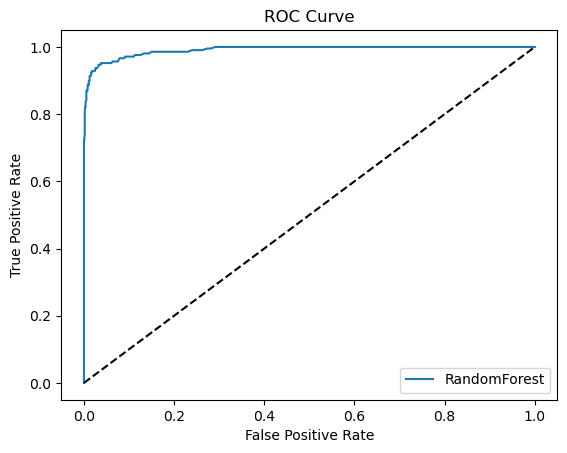

AUC :  0.9910443256295274


In [317]:
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"{name}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC : ", auc)

En testant les meilleurs paramètres sur notre modèle de RandomForest, on obtient un AUC score de 0.99 ce qui est excellent. Notre modèle est donc prêt à prédire avec une excellente précision de futurs données. 

Une fois le modèle entrainé, on peut récupérer la liste des poids associés à chaque variable <sup>[[9]](#ressource-9)</sup> : 

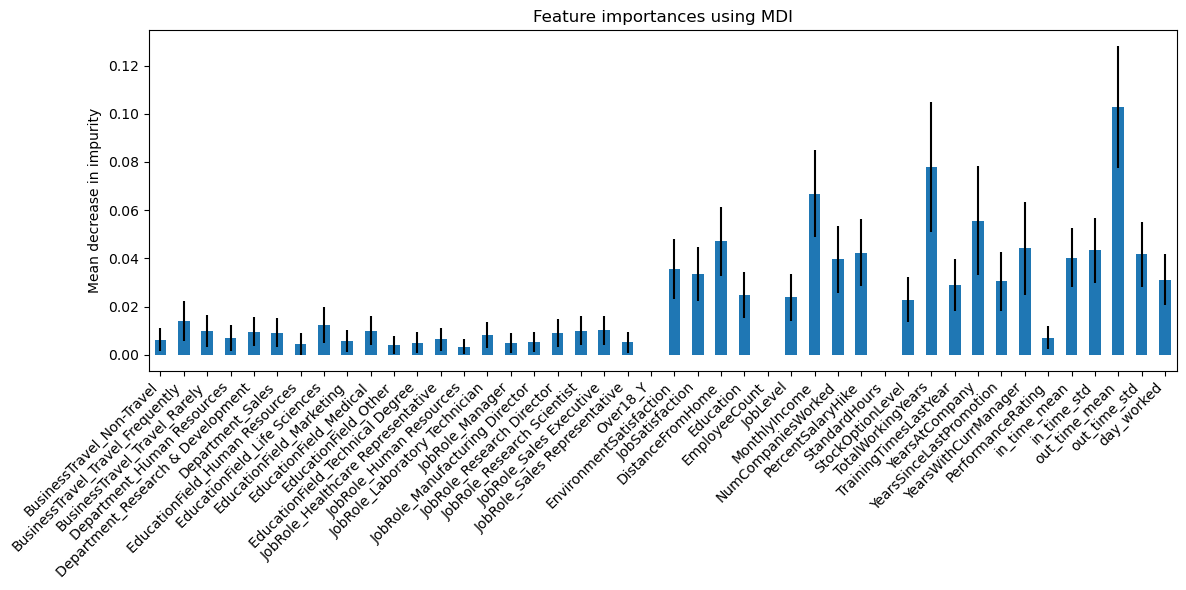

In [318]:
feature_names = merged_scaled_df.drop(columns=['Attrition']).columns
importances = best_model.feature_importances_ 
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)

fig, ax = plt.subplots(figsize=(12, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

On constate que les paramètres avec les importances les plus élevées (`out_time_mean` > `TotalWorkingYear` > `MonthlyIncome`) sont pour la plupart parmi les plus corrélés à `Attrition` d'après la matrice de corrélation. Cependant, `MonthlyIncome` est très peu corrélé à `Attrition` d'après la matrice de corrélation; cependant, il a la troisième plus grande importance. On peut supposer que cette différence est due à la corrélation entre cette variable et une autre, leur effet combiné serait donc très corrélé à la variable cible. 

# Conclusion

Dans le contexte de notre projet, nous voulions trouver un moyen de prédire les employés qui seraient susceptibles de partir de l'entreprise à l'aide de différentes variables mises à disposition par l'entreprise.

Pour ce faire, nous avons commencé par analyser nos données, en écartant celles qui ne respectaient pas les principes éthiques de l’entreprise. Afin d’identifier les employés potentiellement sur le départ, nous avons testé plusieurs modèles de classification, en nous basant notamment sur le nombre de Faux Positifs/Faux Négatifs et sur le score AUC. Après avoir comparé les résultats, nous avons choisi de nous orienter vers le modèle RandomForest, qui affichait un meilleur score AUC que le modèle DecisionTree, bien que ce dernier présentait des caractéristiques générales intéressantes.

Pour optimiser les performances de RandomForest, nous avons recherché les meilleurs hyperparamètres, ce qui nous a permis d’améliorer significativement les résultats obtenus. Nous avons ainsi abouti à un modèle précis, particulièrement adapté à la prédiction des données futures.

Concernant la partie critique, nous avons ajusté uniquement les hyperparamètres du modèle RandomForest que nous avons choisi, alors que dans le cadre d’une étude plus approfondie, il aurait été nécessaire de tester tous les hyperparamètres de chaque modèle. Un autre modèle, avec des hyperparamètres spécifiques, aurait potentiellement pu fournir de meilleurs résultats que le RandomForest.

Ce modèle est désormais capable de prédire avec fiabilité si un employé est susceptible de démissionner. L’entreprise pourra alors utiliser ces informations pour mettre en place des actions ciblées visant à encourager l’employé à rester.

# Bibliographie et Sitographie

<h6 style="display:none">ressource-1</h6>

- \[1] Assessment List for Trustworthy Artificial Intelligence (ALTAI) for self-assessment. (2020, 17 juillet). Shaping Europe’s Digital Future. https://digital-strategy.ec.europa.eu/en/library/assessment-list-trustworthy-artificial-intelligence-altai-self-assessment
> Cette ressource fournit un ensemble de règles, édictées par l'Union Européenne, à respecter pour garantir une transparence et une éthique lors de la création d'un modèle d'IA.

<h6 style="display:none">ressource-2</h6>

- \[2] LE PARLEMENT EUROPÉEN ET LE CONSEIL DE L’UNION EUROPÉENNE. (2016). RÈGLEMENT (UE) 2016/679 DU PARLEMENT EUROPÉEN ET DU CONSEIL. Dans europa.eu. https://eur-lex.europa.eu/legal-content/FR/TXT/PDF/?uri=CELEX:32016R0679
> Ressource concernant la gouvenance et la sécurité des données personnelles (RGPD).

<h6 style="display:none">ressource-3</h6>

- \[3] Perceptron : retour sur l'ancêtre du machine learning https://www.journaldunet.fr/intelligence-artificielle/guide-de-l-intelligence-artificielle/1501903-perceptron/
> Ressource sur le perceptron (Définition, Fonctionnement,...)

<h6 style="display:none">ressource-4</h6>

- \[4] Tremblay, C. (2023, 4 février). L& # 8217 ; AUC ROC. Kobia. https://kobia.fr/classification-metrics-auc-roc/
> Ressource de cours sur la courbe ROC et l'AUC score : la définition, à quoi ça sert et comment l'interpréter.

<h6 style="display:none">ressource-5</h6>

- \[5] Rouse, M. (2024, September 23). Air gap. Techopedia. https://www.techopedia.com/definition/17037/air-gap
> Ressource sur le terme "Air-Gap" avec sa définition et des exemples

<h6 style="display:none">ressource-6</h6>

- \[6] RandomForestClassifier. (s. d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
> Documentation technique du modèle RandomForestClassifier (paramètres, ...)

<h6 style="display:none">ressource-7</h6>

- \[7] Kassel, R. (2023, 9 novembre). Cross-Validation ou Validation croisée : définition et importance. Formation Data Science | DataScientest.com. https://datascientest.com/cross-validation
> Cette ressource fournit une introduction à la vadidation Croisée, notamment sa définition, et son importance

<h6 style="display:none">ressource-8</h6>

- \[8] GridSearchCV. (s. d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
> Documentation technique de GridSearchCV

<h6 style="display:none">ressource-9</h6>

- \[9] Feature importances with a forest of trees. (s. d.). Scikit-learn. https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
> Exemple de visualisation de l'importance de chaque variable dans la prédiction de la variable cible. La visualisation se fait sous la forme d'un histogramme.